In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, linregress

import os
import time
import itertools

from glove.mse_model import *

from sklearn.model_selection import KFold

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-gt7dqk3f because the default path (/home/jaron/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# import file names
files = os.listdir("data/")
files = [f for f in files if "processed" in f]
files

['EXP0019_MS001_processed.csv',
 'EXP0019_DSM27147_processed.csv',
 'EXP0019_MS008_processed.csv',
 'EXP0019_MS014_processed.csv']

# Function to make predictions on test data

In [3]:
def predict_df(model, df, species):
    
    # save measured and predicted values
    pred_species = []
    pred = []
    stdv = []
    true = []

    # pull just the community data
    test_data = process_df(df, species) 

    # plot the results
    for exp, t_span, Y_m in test_data:

        # increase evaluation time
        t_eval = np.linspace(t_span[0], t_span[-1])

        # predict 
        Y_p, Y_std = model.predict(Y_m, t_eval)
        
        # set NaN to zero
        Y_p = np.nan_to_num(Y_p)
        Y_std = np.nan_to_num(Y_std)

        ### append only end-point prediction results for non-zero outcomes ###
        inds_pos = Y_m[-1,:] > 0 
        pred_species.append(np.array(species)[inds_pos])
        true.append(Y_m[-1,:][inds_pos])
        pred.append(Y_p[-1,:][inds_pos])
        stdv.append(Y_std[-1,:][inds_pos])
        
    # concatenate list
    pred_species = np.concatenate(pred_species)
    true = np.concatenate(true)
    pred = np.concatenate(pred)
    stdv = np.concatenate(stdv)
        
    return pred_species, true, pred, stdv

Total samples: 38, Updated regularization: 1.00e-05
Loss: 12.990, Residuals: -0.038
Loss: 7.596, Residuals: -0.014
Loss: 6.262, Residuals: -0.011
Loss: 4.589, Residuals: -0.027
Loss: 4.539, Residuals: -0.005
Loss: 4.114, Residuals: -0.019
Loss: 3.994, Residuals: 0.054
Loss: 3.780, Residuals: 0.028
Loss: 3.640, Residuals: -0.006
Loss: 3.614, Residuals: 0.035
Loss: 3.421, Residuals: -0.005
Loss: 3.418, Residuals: -0.008
Loss: 3.297, Residuals: -0.026
Loss: 3.252, Residuals: -0.021
Loss: 3.173, Residuals: -0.030
Loss: 3.122, Residuals: -0.040
Loss: 3.120, Residuals: -0.041
Loss: 3.054, Residuals: -0.051
Loss: 2.960, Residuals: -0.059
Loss: 2.957, Residuals: -0.057
Loss: 2.941, Residuals: -0.056
Loss: 2.937, Residuals: -0.046
Loss: 2.905, Residuals: -0.053
Loss: 2.903, Residuals: -0.051
Loss: 2.892, Residuals: -0.054
Loss: 2.872, Residuals: -0.059
Loss: 2.868, Residuals: -0.059
Loss: 2.863, Residuals: -0.060
Loss: 2.854, Residuals: -0.063
Loss: 2.837, Residuals: -0.068
Loss: 2.836, Residua

Loss: 151.018, Residuals: -0.008
Loss: 151.017, Residuals: -0.007
Loss: 151.016, Residuals: -0.007
Loss: 151.014, Residuals: -0.008
Loss: 151.014, Residuals: -0.008
Loss: 151.014, Residuals: -0.008
Loss: 151.013, Residuals: -0.008
Loss: 151.013, Residuals: -0.008
Loss: 151.013, Residuals: -0.008
Loss: 151.013, Residuals: -0.008
Loss: 151.013, Residuals: -0.008
Loss: 151.013, Residuals: -0.008
Evidence 456.307
Pass count  1
Total samples: 38, Updated regularization: 1.00e-05
Loss: 12.737, Residuals: -0.055
Loss: 7.220, Residuals: -0.047
Loss: 5.856, Residuals: -0.042
Loss: 4.613, Residuals: -0.014
Loss: 4.505, Residuals: 0.080
Loss: 4.303, Residuals: 0.057
Loss: 3.944, Residuals: 0.026
Loss: 3.759, Residuals: 0.039
Loss: 3.661, Residuals: 0.017
Loss: 3.483, Residuals: 0.004
Loss: 3.244, Residuals: -0.017
Loss: 3.235, Residuals: -0.022
Loss: 3.219, Residuals: -0.023
Loss: 3.190, Residuals: -0.020
Loss: 3.138, Residuals: -0.028
Loss: 3.048, Residuals: -0.040
Loss: 3.038, Residuals: -0.013

Loss: 149.787, Residuals: -0.011
Loss: 149.780, Residuals: -0.012
Loss: 149.776, Residuals: -0.013
Loss: 149.776, Residuals: -0.013
Loss: 149.775, Residuals: -0.013
Loss: 149.775, Residuals: -0.013
Loss: 149.775, Residuals: -0.013
Evidence 458.940
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.75e+00
Loss: 150.270, Residuals: -0.010
Loss: 150.212, Residuals: -0.014
Loss: 150.188, Residuals: -0.011
Loss: 150.181, Residuals: -0.013
Loss: 150.171, Residuals: -0.013
Loss: 150.162, Residuals: -0.013
Loss: 150.160, Residuals: -0.014
Loss: 150.159, Residuals: -0.014
Loss: 150.159, Residuals: -0.013
Loss: 150.158, Residuals: -0.013
Loss: 150.158, Residuals: -0.014
Loss: 150.158, Residuals: -0.014
Loss: 150.158, Residuals: -0.014
Loss: 150.158, Residuals: -0.014
Loss: 150.158, Residuals: -0.014
Evidence 460.120
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.69e+00
Loss: 150.491, Residuals: -0.011
Loss: 150.462, Residuals: -0.014
Loss: 150.44

Loss: 40.956, Residuals: -0.000
Loss: 40.929, Residuals: -0.000
Loss: 40.928, Residuals: -0.001
Loss: 40.926, Residuals: -0.001
Loss: 40.913, Residuals: -0.001
Loss: 40.913, Residuals: -0.001
Loss: 40.912, Residuals: -0.001
Loss: 40.904, Residuals: -0.001
Loss: 40.902, Residuals: -0.001
Loss: 40.902, Residuals: -0.001
Loss: 40.901, Residuals: -0.001
Loss: 40.896, Residuals: -0.001
Loss: 40.895, Residuals: -0.001
Loss: 40.895, Residuals: -0.001
Loss: 40.894, Residuals: -0.001
Loss: 40.892, Residuals: -0.001
Loss: 40.892, Residuals: -0.002
Loss: 40.890, Residuals: -0.001
Loss: 40.889, Residuals: -0.001
Loss: 40.889, Residuals: -0.001
Loss: 40.887, Residuals: -0.001
Loss: 40.887, Residuals: -0.001
Loss: 40.887, Residuals: -0.001
Loss: 40.887, Residuals: -0.001
Loss: 40.885, Residuals: -0.001
Loss: 40.885, Residuals: -0.001
Loss: 40.885, Residuals: -0.001
Loss: 40.884, Residuals: -0.001
Loss: 40.884, Residuals: -0.001
Loss: 40.883, Residuals: -0.001
Loss: 40.883, Residuals: -0.001
Loss: 40

Loss: 155.695, Residuals: -0.019
Loss: 155.668, Residuals: -0.019
Loss: 155.652, Residuals: -0.018
Loss: 155.647, Residuals: -0.019
Loss: 155.645, Residuals: -0.019
Loss: 155.644, Residuals: -0.019
Loss: 155.641, Residuals: -0.019
Loss: 155.639, Residuals: -0.019
Loss: 155.638, Residuals: -0.019
Loss: 155.638, Residuals: -0.019
Loss: 155.638, Residuals: -0.019
Loss: 155.638, Residuals: -0.019
Loss: 155.638, Residuals: -0.019
Loss: 155.638, Residuals: -0.019
Evidence 500.198
Updating hyper-parameters...
Total samples: 40, Updated regularization: 7.54e-01
Loss: 156.136, Residuals: -0.017
Loss: 156.130, Residuals: -0.018
Loss: 156.119, Residuals: -0.018
Loss: 156.106, Residuals: -0.018
Loss: 156.106, Residuals: -0.018
Loss: 156.105, Residuals: -0.018
Loss: 156.104, Residuals: -0.018
Evidence 500.706
Updating hyper-parameters...
Total samples: 40, Updated regularization: 7.46e-01
Loss: 156.369, Residuals: -0.016
Loss: 156.352, Residuals: -0.016
Loss: 156.347, Residuals: -0.017
Loss: 156.34

Loss: 154.434, Residuals: -0.044
Loss: 154.384, Residuals: -0.045
Loss: 154.382, Residuals: -0.045
Loss: 154.357, Residuals: -0.045
Loss: 154.351, Residuals: -0.045
Loss: 154.340, Residuals: -0.045
Loss: 154.321, Residuals: -0.046
Loss: 154.321, Residuals: -0.046
Loss: 154.312, Residuals: -0.046
Loss: 154.301, Residuals: -0.046
Loss: 154.301, Residuals: -0.046
Evidence 484.415
Updating hyper-parameters...
Total samples: 40, Updated regularization: 6.24e-01
Loss: 154.701, Residuals: -0.046
Loss: 154.126, Residuals: -0.048
Loss: 153.690, Residuals: -0.049
Loss: 153.654, Residuals: -0.047
Loss: 153.617, Residuals: -0.044
Loss: 153.589, Residuals: -0.043
Loss: 153.588, Residuals: -0.043
Loss: 153.587, Residuals: -0.044
Loss: 153.576, Residuals: -0.044
Loss: 153.557, Residuals: -0.044
Loss: 153.557, Residuals: -0.044
Loss: 153.547, Residuals: -0.044
Loss: 153.546, Residuals: -0.045
Loss: 153.540, Residuals: -0.045
Loss: 153.540, Residuals: -0.045
Evidence 487.934
Updating hyper-parameters..

Loss: 118.153, Residuals: -0.023
Loss: 118.153, Residuals: -0.023
Loss: 118.151, Residuals: -0.023
Loss: 118.149, Residuals: -0.023
Loss: 118.149, Residuals: -0.023
Evidence 478.129
Updating hyper-parameters...
Total samples: 40, Updated regularization: 4.05e-01
Loss: 142.054, Residuals: -0.021
Loss: 141.757, Residuals: -0.030
Loss: 141.726, Residuals: -0.031
Loss: 141.677, Residuals: -0.031
Loss: 141.605, Residuals: -0.032
Loss: 141.602, Residuals: -0.033
Loss: 141.581, Residuals: -0.033
Loss: 141.576, Residuals: -0.034
Loss: 141.570, Residuals: -0.034
Loss: 141.569, Residuals: -0.034
Loss: 141.567, Residuals: -0.034
Loss: 141.567, Residuals: -0.034
Loss: 141.565, Residuals: -0.034
Loss: 141.564, Residuals: -0.035
Loss: 141.564, Residuals: -0.034
Loss: 141.564, Residuals: -0.034
Loss: 141.564, Residuals: -0.035
Loss: 141.563, Residuals: -0.035
Loss: 141.563, Residuals: -0.035
Loss: 141.563, Residuals: -0.035
Loss: 141.563, Residuals: -0.035
Evidence 492.426
Updating hyper-parameters..

Loss: 110.242, Residuals: -0.019
Loss: 110.240, Residuals: -0.019
Loss: 110.240, Residuals: -0.018
Loss: 110.239, Residuals: -0.018
Loss: 110.238, Residuals: -0.018
Loss: 110.236, Residuals: -0.018
Loss: 110.236, Residuals: -0.018
Loss: 110.236, Residuals: -0.018
Loss: 110.236, Residuals: -0.018
Loss: 110.236, Residuals: -0.018
Loss: 110.236, Residuals: -0.018
Loss: 110.236, Residuals: -0.018
Loss: 110.236, Residuals: -0.018
Evidence 428.949
Updating hyper-parameters...
Total samples: 37, Updated regularization: 7.88e-01
Loss: 133.215, Residuals: -0.016
Loss: 132.882, Residuals: -0.022
Loss: 132.660, Residuals: -0.020
Loss: 132.616, Residuals: -0.022
Loss: 132.560, Residuals: -0.021
Loss: 132.556, Residuals: -0.021
Loss: 132.521, Residuals: -0.021
Loss: 132.490, Residuals: -0.021
Loss: 132.488, Residuals: -0.021
Loss: 132.486, Residuals: -0.022
Loss: 132.483, Residuals: -0.022
Loss: 132.482, Residuals: -0.021
Loss: 132.482, Residuals: -0.021
Loss: 132.482, Residuals: -0.021
Loss: 132.4

Loss: 85.347, Residuals: 0.007
Loss: 85.324, Residuals: 0.007
Loss: 85.323, Residuals: 0.007
Loss: 85.321, Residuals: 0.006
Loss: 85.270, Residuals: 0.007
Loss: 85.264, Residuals: 0.006
Loss: 85.260, Residuals: 0.007
Loss: 85.256, Residuals: 0.006
Loss: 85.255, Residuals: 0.006
Loss: 85.213, Residuals: 0.006
Loss: 85.203, Residuals: 0.006
Loss: 85.197, Residuals: 0.006
Loss: 85.190, Residuals: 0.006
Loss: 85.186, Residuals: 0.006
Loss: 84.796, Residuals: 0.006
Loss: 84.729, Residuals: 0.009
Loss: 84.691, Residuals: 0.009
Loss: 84.635, Residuals: 0.008
Loss: 84.599, Residuals: 0.006
Loss: 84.593, Residuals: 0.006
Loss: 84.585, Residuals: 0.006
Loss: 84.572, Residuals: 0.006
Loss: 84.552, Residuals: 0.006
Loss: 84.550, Residuals: 0.006
Loss: 84.547, Residuals: 0.006
Loss: 84.546, Residuals: 0.006
Loss: 84.540, Residuals: 0.006
Loss: 84.540, Residuals: 0.006
Loss: 84.530, Residuals: 0.007
Loss: 84.530, Residuals: 0.006
Loss: 84.526, Residuals: 0.007
Loss: 84.526, Residuals: 0.007
Loss: 84

Loss: 11.007, Residuals: -0.063
Loss: 10.948, Residuals: -0.043
Loss: 10.855, Residuals: -0.041
Loss: 10.781, Residuals: -0.039
Loss: 10.781, Residuals: -0.039
Loss: 10.671, Residuals: -0.035
Loss: 10.521, Residuals: -0.022
Loss: 10.517, Residuals: -0.023
Loss: 10.513, Residuals: -0.020
Loss: 10.467, Residuals: -0.018
Loss: 10.416, Residuals: -0.009
Loss: 10.413, Residuals: -0.012
Loss: 10.408, Residuals: -0.012
Loss: 10.399, Residuals: -0.011
Loss: 10.397, Residuals: -0.008
Loss: 10.381, Residuals: -0.007
Loss: 10.381, Residuals: -0.008
Loss: 10.360, Residuals: -0.007
Loss: 10.359, Residuals: -0.006
Loss: 10.349, Residuals: -0.005
Loss: 10.332, Residuals: -0.003
Loss: 10.331, Residuals: -0.003
Loss: 10.331, Residuals: -0.003
Evidence 98.607
Updating hyper-parameters...
Total samples: 38, Updated regularization: 3.42e-02
Loss: 38.775, Residuals: -0.003
Loss: 38.768, Residuals: -0.003
Loss: 38.701, Residuals: -0.002
Loss: 38.585, Residuals: -0.001
Loss: 38.436, Residuals: 0.002
Loss: 38

Loss: 9.956, Residuals: -0.014
Loss: 9.954, Residuals: -0.013
Loss: 9.954, Residuals: -0.013
Loss: 9.952, Residuals: -0.014
Loss: 9.952, Residuals: -0.013
Loss: 9.952, Residuals: -0.013
Loss: 9.952, Residuals: -0.014
Loss: 9.951, Residuals: -0.014
Loss: 9.950, Residuals: -0.014
Loss: 9.950, Residuals: -0.014
Loss: 9.950, Residuals: -0.014
Loss: 9.950, Residuals: -0.014
Loss: 9.950, Residuals: -0.014
Loss: 9.948, Residuals: -0.014
Loss: 9.948, Residuals: -0.014
Evidence 71.964
Updating hyper-parameters...
Total samples: 37, Updated regularization: 6.68e-02
Loss: 34.865, Residuals: -0.008
Loss: 34.804, Residuals: -0.008
Loss: 34.788, Residuals: -0.009
Loss: 34.642, Residuals: -0.007
Loss: 34.513, Residuals: -0.004
Loss: 34.508, Residuals: -0.009
Loss: 34.459, Residuals: -0.007
Loss: 34.376, Residuals: -0.005
Loss: 34.363, Residuals: -0.002
Loss: 34.339, Residuals: -0.001
Loss: 34.299, Residuals: 0.000
Loss: 34.286, Residuals: -0.000
Loss: 34.286, Residuals: -0.001
Loss: 34.266, Residuals

Loss: 2.934, Residuals: -0.070
Loss: 2.934, Residuals: -0.073
Loss: 2.934, Residuals: -0.072
Loss: 2.912, Residuals: -0.076
Loss: 2.912, Residuals: -0.077
Loss: 2.893, Residuals: -0.080
Loss: 2.892, Residuals: -0.079
Loss: 2.889, Residuals: -0.079
Loss: 2.884, Residuals: -0.079
Loss: 2.882, Residuals: -0.079
Loss: 2.856, Residuals: -0.084
Loss: 2.855, Residuals: -0.085
Loss: 2.815, Residuals: -0.084
Loss: 2.805, Residuals: -0.081
Loss: 2.800, Residuals: -0.080
Loss: 2.794, Residuals: -0.073
Loss: 2.744, Residuals: -0.083
Loss: 2.741, Residuals: -0.080
Loss: 2.738, Residuals: -0.082
Loss: 2.734, Residuals: -0.079
Loss: 2.728, Residuals: -0.079
Loss: 2.717, Residuals: -0.078
Loss: 2.713, Residuals: -0.081
Loss: 2.713, Residuals: -0.077
Loss: 2.712, Residuals: -0.079
Loss: 2.679, Residuals: -0.084
Loss: 2.679, Residuals: -0.084
Loss: 2.679, Residuals: -0.084
Loss: 2.677, Residuals: -0.084
Loss: 2.674, Residuals: -0.083
Loss: 2.674, Residuals: -0.078
Loss: 2.634, Residuals: -0.087
Loss: 2.

Loss: 145.066, Residuals: -0.033
Loss: 145.060, Residuals: -0.033
Loss: 145.006, Residuals: -0.032
Loss: 144.506, Residuals: -0.030
Loss: 144.500, Residuals: -0.029
Loss: 144.489, Residuals: -0.030
Loss: 144.470, Residuals: -0.030
Loss: 144.445, Residuals: -0.032
Loss: 144.204, Residuals: -0.031
Loss: 144.182, Residuals: -0.032
Loss: 144.149, Residuals: -0.031
Loss: 143.858, Residuals: -0.030
Loss: 143.856, Residuals: -0.029
Loss: 143.844, Residuals: -0.030
Loss: 143.727, Residuals: -0.029
Loss: 143.712, Residuals: -0.031
Loss: 143.594, Residuals: -0.030
Loss: 143.585, Residuals: -0.031
Loss: 143.573, Residuals: -0.029
Loss: 143.552, Residuals: -0.029
Loss: 143.519, Residuals: -0.029
Loss: 143.516, Residuals: -0.029
Loss: 143.513, Residuals: -0.029
Loss: 143.509, Residuals: -0.029
Loss: 143.508, Residuals: -0.029
Loss: 143.501, Residuals: -0.029
Loss: 143.494, Residuals: -0.028
Loss: 143.494, Residuals: -0.029
Loss: 143.493, Residuals: -0.029
Loss: 143.489, Residuals: -0.028
Loss: 143.

Loss: 11.586, Residuals: -0.002
Loss: 11.586, Residuals: -0.002
Loss: 11.586, Residuals: -0.002
Loss: 11.585, Residuals: -0.002
Loss: 11.585, Residuals: -0.002
Loss: 11.585, Residuals: -0.002
Evidence 103.106
Updating hyper-parameters...
Total samples: 38, Updated regularization: 4.64e-02
Loss: 39.694, Residuals: -0.010
Loss: 39.624, Residuals: -0.009
Loss: 39.501, Residuals: -0.005
Loss: 39.347, Residuals: 0.008
Loss: 39.333, Residuals: 0.007
Loss: 39.307, Residuals: 0.007
Loss: 39.260, Residuals: 0.008
Loss: 39.187, Residuals: 0.008
Loss: 39.063, Residuals: 0.009
Loss: 39.058, Residuals: 0.009
Loss: 39.047, Residuals: 0.009
Loss: 39.028, Residuals: 0.009
Loss: 38.992, Residuals: 0.010
Loss: 38.961, Residuals: 0.009
Loss: 38.906, Residuals: 0.010
Loss: 38.904, Residuals: 0.009
Loss: 38.827, Residuals: 0.012
Loss: 38.822, Residuals: 0.010
Loss: 38.813, Residuals: 0.011
Loss: 38.798, Residuals: 0.012
Loss: 38.769, Residuals: 0.013
Loss: 38.764, Residuals: 0.014
Loss: 38.721, Residuals: 

Loss: 149.904, Residuals: 0.012
Loss: 149.904, Residuals: 0.012
Loss: 149.904, Residuals: 0.012
Loss: 149.904, Residuals: 0.012
Evidence 479.509
Updating hyper-parameters...
Total samples: 38, Updated regularization: 2.78e-01
Loss: 150.354, Residuals: 0.014
Loss: 150.332, Residuals: 0.013
Loss: 150.331, Residuals: 0.013
Loss: 150.327, Residuals: 0.012
Loss: 150.325, Residuals: 0.012
Loss: 150.325, Residuals: 0.012
Loss: 150.322, Residuals: 0.012
Loss: 150.318, Residuals: 0.012
Loss: 150.318, Residuals: 0.012
Loss: 150.318, Residuals: 0.012
Loss: 150.317, Residuals: 0.012
Loss: 150.317, Residuals: 0.012
Evidence 480.258
Updating hyper-parameters...
Total samples: 38, Updated regularization: 2.76e-01
Loss: 150.638, Residuals: 0.013
Loss: 150.629, Residuals: 0.012
Loss: 150.627, Residuals: 0.012
Loss: 150.626, Residuals: 0.012
Loss: 150.625, Residuals: 0.012
Loss: 150.622, Residuals: 0.012
Loss: 150.622, Residuals: 0.011
Loss: 150.620, Residuals: 0.011
Loss: 150.617, Residuals: 0.011
Loss

Loss: 122.885, Residuals: -0.006
Loss: 122.854, Residuals: -0.007
Loss: 122.853, Residuals: -0.007
Loss: 122.852, Residuals: -0.007
Loss: 122.851, Residuals: -0.007
Loss: 122.849, Residuals: -0.007
Loss: 122.849, Residuals: -0.007
Loss: 122.849, Residuals: -0.007
Evidence 481.377
Updating hyper-parameters...
Total samples: 40, Updated regularization: 1.84e+00
Loss: 144.688, Residuals: -0.012
Loss: 144.612, Residuals: -0.013
Loss: 144.504, Residuals: -0.014
Loss: 144.396, Residuals: -0.018
Loss: 144.394, Residuals: -0.017
Loss: 144.389, Residuals: -0.017
Loss: 144.382, Residuals: -0.018
Loss: 144.372, Residuals: -0.018
Loss: 144.371, Residuals: -0.019
Loss: 144.369, Residuals: -0.019
Loss: 144.364, Residuals: -0.019
Loss: 144.360, Residuals: -0.020
Loss: 144.360, Residuals: -0.020
Loss: 144.360, Residuals: -0.019
Loss: 144.360, Residuals: -0.019
Loss: 144.359, Residuals: -0.019
Loss: 144.359, Residuals: -0.019
Loss: 144.359, Residuals: -0.019
Evidence 492.493
Updating hyper-parameters..

Loss: 80.886, Residuals: -0.007
Loss: 80.882, Residuals: -0.007
Loss: 80.852, Residuals: -0.008
Loss: 80.850, Residuals: -0.008
Loss: 80.828, Residuals: -0.008
Loss: 80.827, Residuals: -0.008
Loss: 80.822, Residuals: -0.008
Loss: 80.821, Residuals: -0.009
Loss: 80.811, Residuals: -0.009
Loss: 80.810, Residuals: -0.009
Loss: 80.801, Residuals: -0.009
Loss: 80.801, Residuals: -0.009
Loss: 80.793, Residuals: -0.009
Loss: 80.793, Residuals: -0.009
Loss: 80.787, Residuals: -0.009
Loss: 80.786, Residuals: -0.009
Loss: 80.785, Residuals: -0.009
Loss: 80.784, Residuals: -0.009
Loss: 80.778, Residuals: -0.009
Loss: 80.777, Residuals: -0.009
Loss: 80.775, Residuals: -0.009
Loss: 80.775, Residuals: -0.009
Loss: 80.771, Residuals: -0.009
Loss: 80.771, Residuals: -0.009
Loss: 80.771, Residuals: -0.009
Loss: 80.771, Residuals: -0.009
Loss: 80.770, Residuals: -0.009
Loss: 80.770, Residuals: -0.010
Evidence 408.380
Updating hyper-parameters...
Total samples: 38, Updated regularization: 3.74e-01
Loss: 

Loss: 2.812, Residuals: -0.078
Loss: 2.803, Residuals: -0.073
Loss: 2.802, Residuals: -0.074
Loss: 2.795, Residuals: -0.074
Loss: 2.783, Residuals: -0.073
Loss: 2.767, Residuals: -0.072
Loss: 2.767, Residuals: -0.073
Loss: 2.766, Residuals: -0.073
Loss: 2.764, Residuals: -0.072
Loss: 2.761, Residuals: -0.071
Loss: 2.761, Residuals: -0.071
Evidence -389.493
Updating hyper-parameters...
Total samples: 40, Updated regularization: 1.72e-03
Loss: 12.938, Residuals: -0.046
Loss: 12.900, Residuals: -0.052
Loss: 12.832, Residuals: -0.050
Loss: 12.727, Residuals: -0.045
Loss: 12.632, Residuals: -0.029
Loss: 12.630, Residuals: -0.031
Loss: 12.609, Residuals: -0.030
Loss: 12.569, Residuals: -0.029
Loss: 12.499, Residuals: -0.025
Loss: 12.490, Residuals: -0.020
Loss: 12.473, Residuals: -0.020
Loss: 12.442, Residuals: -0.018
Loss: 12.433, Residuals: -0.018
Loss: 12.418, Residuals: -0.017
Loss: 12.396, Residuals: -0.017
Loss: 12.395, Residuals: -0.016
Loss: 12.373, Residuals: -0.017
Loss: 12.372, Re

Loss: 157.141, Residuals: -0.019
Loss: 157.139, Residuals: -0.019
Loss: 157.048, Residuals: -0.018
Loss: 157.048, Residuals: -0.019
Evidence 481.810
Fail count  1
Updating hyper-parameters...
Total samples: 40, Updated regularization: 7.83e-01
Loss: 157.893, Residuals: -0.015
Loss: 157.885, Residuals: -0.014
Loss: 157.826, Residuals: -0.014
Loss: 157.713, Residuals: -0.013
Loss: 157.697, Residuals: -0.014
Loss: 157.555, Residuals: -0.013
Loss: 157.554, Residuals: -0.013
Loss: 157.468, Residuals: -0.013
Loss: 157.464, Residuals: -0.012
Loss: 157.347, Residuals: -0.011
Loss: 157.346, Residuals: -0.011
Evidence 483.674
Updating hyper-parameters...
Total samples: 40, Updated regularization: 1.27e+00
Loss: 158.293, Residuals: -0.009
Loss: 158.274, Residuals: -0.008
Loss: 158.118, Residuals: -0.007
Loss: 158.110, Residuals: -0.007
Loss: 158.097, Residuals: -0.007
Loss: 158.072, Residuals: -0.007
Loss: 158.033, Residuals: -0.006
Loss: 158.031, Residuals: -0.005
Loss: 158.014, Residuals: -0.00

Loss: 158.279, Residuals: -0.011
Loss: 158.277, Residuals: -0.012
Loss: 158.277, Residuals: -0.012
Loss: 158.276, Residuals: -0.012
Loss: 158.275, Residuals: -0.012
Loss: 158.275, Residuals: -0.012
Loss: 158.275, Residuals: -0.012
Loss: 158.275, Residuals: -0.012
Loss: 158.274, Residuals: -0.012
Loss: 158.274, Residuals: -0.012
Loss: 158.274, Residuals: -0.012
Loss: 158.274, Residuals: -0.012
Loss: 158.274, Residuals: -0.012
Evidence 481.685
Pass count  1
Total samples: 38, Updated regularization: 1.00e-05
Loss: 13.411, Residuals: -0.028
Loss: 7.639, Residuals: -0.020
Loss: 6.251, Residuals: -0.022
Loss: 4.981, Residuals: -0.024
Loss: 4.269, Residuals: 0.011
Loss: 4.006, Residuals: -0.030
Loss: 3.880, Residuals: -0.025
Loss: 3.682, Residuals: -0.029
Loss: 3.653, Residuals: 0.013
Loss: 3.426, Residuals: -0.012
Loss: 3.182, Residuals: -0.053
Loss: 3.149, Residuals: -0.048
Loss: 3.141, Residuals: -0.037
Loss: 3.073, Residuals: -0.039
Loss: 3.037, Residuals: -0.030
Loss: 3.030, Residuals: 

Loss: 150.378, Residuals: -0.006
Evidence 453.471
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.83e+00
Loss: 151.382, Residuals: -0.005
Loss: 151.343, Residuals: -0.004
Loss: 151.336, Residuals: -0.005
Loss: 151.334, Residuals: -0.005
Loss: 151.330, Residuals: -0.005
Loss: 151.326, Residuals: -0.005
Loss: 151.326, Residuals: -0.005
Loss: 151.326, Residuals: -0.005
Loss: 151.326, Residuals: -0.005
Evidence 454.313
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.84e+00
Loss: 151.804, Residuals: -0.005
Loss: 151.775, Residuals: -0.004
Loss: 151.771, Residuals: -0.005
Loss: 151.766, Residuals: -0.005
Loss: 151.766, Residuals: -0.005
Loss: 151.765, Residuals: -0.005
Loss: 151.765, Residuals: -0.005
Loss: 151.765, Residuals: -0.005
Loss: 151.765, Residuals: -0.005
Evidence 454.892
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.85e+00
Loss: 152.019, Residuals: -0.004
Loss: 152.016, Residuals: -0.005
Loss: 152.010

Loss: 127.792, Residuals: -0.001
Loss: 127.635, Residuals: -0.001
Loss: 127.628, Residuals: -0.002
Loss: 127.570, Residuals: -0.001
Loss: 127.569, Residuals: -0.001
Loss: 127.545, Residuals: -0.001
Loss: 127.509, Residuals: -0.001
Loss: 127.507, Residuals: -0.002
Loss: 127.506, Residuals: -0.001
Loss: 127.503, Residuals: -0.001
Loss: 127.502, Residuals: -0.001
Loss: 127.502, Residuals: -0.001
Loss: 127.499, Residuals: -0.001
Loss: 127.499, Residuals: -0.001
Loss: 127.494, Residuals: -0.001
Loss: 127.494, Residuals: -0.001
Evidence 476.744
Updating hyper-parameters...
Total samples: 40, Updated regularization: 5.29e-01
Loss: 147.504, Residuals: -0.000
Loss: 147.354, Residuals: -0.002
Loss: 147.173, Residuals: -0.004
Loss: 147.088, Residuals: -0.003
Loss: 147.062, Residuals: -0.003
Loss: 147.053, Residuals: -0.003
Loss: 146.989, Residuals: -0.003
Loss: 146.988, Residuals: -0.003
Loss: 146.959, Residuals: -0.003
Loss: 146.959, Residuals: -0.003
Loss: 146.959, Residuals: -0.003
Loss: 146.9

Loss: 128.112, Residuals: -0.016
Loss: 128.104, Residuals: -0.016
Loss: 128.034, Residuals: -0.016
Loss: 127.920, Residuals: -0.017
Loss: 127.919, Residuals: -0.017
Loss: 127.871, Residuals: -0.017
Loss: 127.869, Residuals: -0.017
Loss: 127.777, Residuals: -0.018
Loss: 127.774, Residuals: -0.018
Loss: 127.772, Residuals: -0.018
Loss: 127.707, Residuals: -0.019
Loss: 127.702, Residuals: -0.019
Loss: 127.698, Residuals: -0.018
Loss: 127.693, Residuals: -0.019
Loss: 127.692, Residuals: -0.019
Loss: 127.651, Residuals: -0.020
Loss: 127.647, Residuals: -0.020
Loss: 127.643, Residuals: -0.019
Loss: 127.635, Residuals: -0.020
Loss: 127.631, Residuals: -0.020
Loss: 127.625, Residuals: -0.020
Loss: 127.621, Residuals: -0.019
Loss: 127.450, Residuals: -0.020
Loss: 127.390, Residuals: -0.019
Loss: 127.323, Residuals: -0.017
Loss: 127.215, Residuals: -0.019
Loss: 127.159, Residuals: -0.015
Loss: 126.647, Residuals: -0.016
Loss: 126.557, Residuals: -0.018
Loss: 126.537, Residuals: -0.015
Loss: 125.

Loss: 43.943, Residuals: -0.020
Loss: 43.834, Residuals: -0.019
Loss: 43.650, Residuals: -0.015
Loss: 43.418, Residuals: -0.007
Loss: 43.281, Residuals: -0.005
Loss: 43.062, Residuals: -0.003
Loss: 43.047, Residuals: -0.002
Loss: 42.914, Residuals: -0.000
Loss: 42.718, Residuals: 0.004
Loss: 42.717, Residuals: 0.005
Loss: 42.711, Residuals: 0.004
Loss: 42.700, Residuals: 0.003
Loss: 42.686, Residuals: 0.004
Loss: 42.660, Residuals: 0.005
Loss: 42.653, Residuals: 0.006
Loss: 42.639, Residuals: 0.006
Loss: 42.613, Residuals: 0.006
Loss: 42.612, Residuals: 0.006
Loss: 42.612, Residuals: 0.005
Loss: 42.569, Residuals: 0.007
Loss: 42.568, Residuals: 0.005
Loss: 42.567, Residuals: 0.007
Loss: 42.566, Residuals: 0.007
Loss: 42.564, Residuals: 0.006
Loss: 42.560, Residuals: 0.006
Loss: 42.560, Residuals: 0.006
Loss: 42.552, Residuals: 0.006
Loss: 42.551, Residuals: 0.006
Loss: 42.543, Residuals: 0.007
Loss: 42.543, Residuals: 0.006
Loss: 42.541, Residuals: 0.006
Loss: 42.530, Residuals: 0.007


Loss: 149.360, Residuals: 0.004
Loss: 149.359, Residuals: 0.004
Evidence 457.137
Updating hyper-parameters...
Total samples: 39, Updated regularization: 1.58e+00
Loss: 151.670, Residuals: 0.005
Loss: 151.642, Residuals: 0.004
Loss: 151.616, Residuals: 0.005
Loss: 151.611, Residuals: 0.004
Loss: 151.609, Residuals: 0.004
Loss: 151.606, Residuals: 0.003
Loss: 151.603, Residuals: 0.002
Loss: 151.603, Residuals: 0.002
Loss: 151.603, Residuals: 0.002
Loss: 151.603, Residuals: 0.003
Loss: 151.603, Residuals: 0.003
Loss: 151.602, Residuals: 0.003
Loss: 151.602, Residuals: 0.003
Loss: 151.602, Residuals: 0.003
Evidence 458.499
Updating hyper-parameters...
Total samples: 39, Updated regularization: 1.55e+00
Loss: 152.523, Residuals: 0.004
Loss: 152.507, Residuals: 0.003
Loss: 152.494, Residuals: 0.004
Loss: 152.492, Residuals: 0.003
Loss: 152.490, Residuals: 0.003
Loss: 152.488, Residuals: 0.002
Loss: 152.488, Residuals: 0.002
Loss: 152.487, Residuals: 0.002
Loss: 152.487, Residuals: 0.002
Loss

Loss: 87.414, Residuals: -0.018
Loss: 87.367, Residuals: -0.017
Loss: 87.304, Residuals: -0.016
Loss: 87.300, Residuals: -0.017
Loss: 87.295, Residuals: -0.016
Loss: 87.286, Residuals: -0.016
Loss: 87.270, Residuals: -0.016
Loss: 87.270, Residuals: -0.016
Loss: 87.254, Residuals: -0.016
Loss: 87.253, Residuals: -0.016
Loss: 87.246, Residuals: -0.016
Loss: 87.245, Residuals: -0.016
Loss: 87.244, Residuals: -0.017
Loss: 87.237, Residuals: -0.017
Loss: 87.226, Residuals: -0.017
Loss: 87.226, Residuals: -0.017
Loss: 87.226, Residuals: -0.017
Loss: 87.224, Residuals: -0.017
Loss: 87.222, Residuals: -0.017
Loss: 87.222, Residuals: -0.017
Loss: 87.222, Residuals: -0.017
Loss: 87.222, Residuals: -0.017
Loss: 87.221, Residuals: -0.017
Loss: 87.221, Residuals: -0.017
Loss: 87.220, Residuals: -0.017
Loss: 87.219, Residuals: -0.017
Loss: 87.219, Residuals: -0.017
Evidence 419.675
Updating hyper-parameters...
Total samples: 40, Updated regularization: 3.00e-01
Loss: 126.802, Residuals: -0.012
Loss:

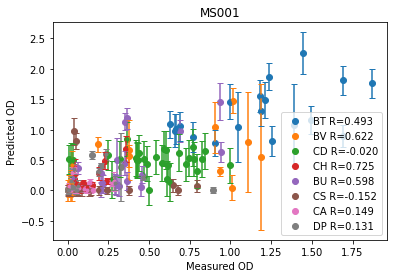

Total samples: 38, Updated regularization: 1.00e-05
Loss: 11.795, Residuals: -0.112
Loss: 6.986, Residuals: -0.031
Loss: 5.020, Residuals: -0.041
Loss: 4.366, Residuals: -0.068
Loss: 3.985, Residuals: -0.065
Loss: 3.861, Residuals: 0.009
Loss: 3.653, Residuals: -0.008
Loss: 3.515, Residuals: -0.015
Loss: 3.393, Residuals: -0.001
Loss: 3.332, Residuals: 0.053
Loss: 3.225, Residuals: 0.043
Loss: 3.080, Residuals: 0.033
Loss: 2.913, Residuals: 0.003
Loss: 2.888, Residuals: 0.005
Loss: 2.849, Residuals: 0.002
Loss: 2.803, Residuals: -0.005
Loss: 2.799, Residuals: 0.007
Loss: 2.759, Residuals: 0.000
Loss: 2.692, Residuals: -0.014
Loss: 2.654, Residuals: -0.016
Loss: 2.595, Residuals: -0.037
Loss: 2.589, Residuals: -0.029
Loss: 2.542, Residuals: -0.040
Loss: 2.537, Residuals: -0.033
Loss: 2.528, Residuals: -0.034
Loss: 2.511, Residuals: -0.039
Loss: 2.483, Residuals: -0.052
Loss: 2.482, Residuals: -0.050
Loss: 2.481, Residuals: -0.051
Loss: 2.478, Residuals: -0.051
Loss: 2.459, Residuals: -0

Loss: 122.445, Residuals: 0.010
Loss: 122.444, Residuals: 0.010
Loss: 122.443, Residuals: 0.010
Loss: 122.429, Residuals: 0.010
Loss: 122.423, Residuals: 0.010
Loss: 122.416, Residuals: 0.010
Loss: 122.409, Residuals: 0.010
Loss: 122.404, Residuals: 0.010
Loss: 122.402, Residuals: 0.010
Loss: 122.381, Residuals: 0.010
Loss: 122.377, Residuals: 0.010
Loss: 122.369, Residuals: 0.010
Loss: 122.363, Residuals: 0.010
Loss: 122.352, Residuals: 0.009
Loss: 122.346, Residuals: 0.009
Loss: 122.344, Residuals: 0.010
Loss: 122.329, Residuals: 0.010
Loss: 122.325, Residuals: 0.009
Loss: 122.320, Residuals: 0.009
Loss: 122.311, Residuals: 0.009
Loss: 122.307, Residuals: 0.009
Loss: 122.306, Residuals: 0.009
Loss: 122.296, Residuals: 0.009
Loss: 122.280, Residuals: 0.009
Loss: 122.279, Residuals: 0.009
Loss: 122.273, Residuals: 0.009
Loss: 122.270, Residuals: 0.009
Loss: 122.270, Residuals: 0.009
Loss: 122.263, Residuals: 0.009
Loss: 122.258, Residuals: 0.009
Loss: 122.257, Residuals: 0.009
Loss: 12

Loss: 37.535, Residuals: -0.027
Loss: 37.513, Residuals: -0.027
Loss: 37.473, Residuals: -0.026
Loss: 37.398, Residuals: -0.026
Loss: 37.271, Residuals: -0.023
Loss: 37.250, Residuals: -0.022
Loss: 37.078, Residuals: -0.018
Loss: 37.074, Residuals: -0.017
Loss: 36.927, Residuals: -0.015
Loss: 36.725, Residuals: -0.010
Loss: 36.698, Residuals: -0.008
Loss: 36.690, Residuals: -0.010
Loss: 36.676, Residuals: -0.010
Loss: 36.651, Residuals: -0.008
Loss: 36.611, Residuals: -0.006
Loss: 36.564, Residuals: -0.004
Loss: 36.556, Residuals: -0.004
Loss: 36.545, Residuals: -0.003
Loss: 36.534, Residuals: -0.003
Loss: 36.533, Residuals: -0.004
Loss: 36.525, Residuals: -0.004
Loss: 36.511, Residuals: -0.003
Loss: 36.505, Residuals: -0.002
Loss: 36.493, Residuals: -0.002
Loss: 36.493, Residuals: -0.003
Loss: 36.471, Residuals: -0.001
Loss: 36.469, Residuals: -0.002
Loss: 36.464, Residuals: -0.001
Loss: 36.456, Residuals: -0.001
Loss: 36.446, Residuals: -0.001
Loss: 36.446, Residuals: -0.001
Loss: 36

Loss: 1.622, Residuals: -0.065
Loss: 1.622, Residuals: -0.064
Loss: 1.620, Residuals: -0.063
Loss: 1.620, Residuals: -0.063
Loss: 1.620, Residuals: -0.063
Loss: 1.620, Residuals: -0.063
Loss: 1.618, Residuals: -0.063
Loss: 1.618, Residuals: -0.063
Loss: 1.618, Residuals: -0.063
Loss: 1.616, Residuals: -0.063
Loss: 1.616, Residuals: -0.063
Loss: 1.616, Residuals: -0.063
Loss: 1.616, Residuals: -0.063
Loss: 1.615, Residuals: -0.063
Loss: 1.615, Residuals: -0.063
Loss: 1.612, Residuals: -0.063
Loss: 1.612, Residuals: -0.063
Loss: 1.612, Residuals: -0.063
Loss: 1.605, Residuals: -0.062
Loss: 1.605, Residuals: -0.064
Loss: 1.604, Residuals: -0.063
Loss: 1.597, Residuals: -0.065
Loss: 1.597, Residuals: -0.063
Loss: 1.596, Residuals: -0.063
Loss: 1.595, Residuals: -0.063
Loss: 1.593, Residuals: -0.063
Loss: 1.593, Residuals: -0.064
Loss: 1.590, Residuals: -0.064
Loss: 1.589, Residuals: -0.063
Loss: 1.583, Residuals: -0.064
Loss: 1.583, Residuals: -0.064
Loss: 1.582, Residuals: -0.063
Loss: 1.

Loss: 2.285, Residuals: -0.084
Loss: 2.276, Residuals: -0.084
Loss: 2.276, Residuals: -0.084
Loss: 2.270, Residuals: -0.084
Loss: 2.268, Residuals: -0.084
Loss: 2.255, Residuals: -0.084
Loss: 2.255, Residuals: -0.085
Loss: 2.254, Residuals: -0.083
Loss: 2.242, Residuals: -0.082
Loss: 2.241, Residuals: -0.084
Loss: 2.241, Residuals: -0.083
Loss: 2.240, Residuals: -0.082
Loss: 2.239, Residuals: -0.082
Loss: 2.230, Residuals: -0.082
Loss: 2.230, Residuals: -0.083
Loss: 2.230, Residuals: -0.081
Loss: 2.229, Residuals: -0.080
Loss: 2.224, Residuals: -0.083
Loss: 2.224, Residuals: -0.083
Loss: 2.217, Residuals: -0.083
Loss: 2.216, Residuals: -0.084
Loss: 2.215, Residuals: -0.083
Loss: 2.209, Residuals: -0.086
Loss: 2.209, Residuals: -0.086
Loss: 2.208, Residuals: -0.085
Loss: 2.204, Residuals: -0.087
Loss: 2.204, Residuals: -0.085
Loss: 2.203, Residuals: -0.086
Loss: 2.201, Residuals: -0.088
Loss: 2.201, Residuals: -0.088
Loss: 2.195, Residuals: -0.092
Loss: 2.195, Residuals: -0.092
Loss: 2.

Loss: 154.793, Residuals: -0.003
Loss: 154.793, Residuals: -0.003
Loss: 154.793, Residuals: -0.003
Evidence 460.251
Updating hyper-parameters...
Total samples: 40, Updated regularization: 8.36e-01
Loss: 155.665, Residuals: -0.001
Loss: 155.656, Residuals: -0.002
Loss: 155.642, Residuals: -0.002
Loss: 155.628, Residuals: -0.001
Loss: 155.626, Residuals: -0.001
Loss: 155.625, Residuals: -0.002
Loss: 155.623, Residuals: -0.002
Loss: 155.622, Residuals: -0.001
Loss: 155.621, Residuals: -0.002
Loss: 155.618, Residuals: -0.002
Loss: 155.618, Residuals: -0.002
Loss: 155.618, Residuals: -0.002
Loss: 155.618, Residuals: -0.002
Loss: 155.618, Residuals: -0.002
Loss: 155.618, Residuals: -0.002
Loss: 155.618, Residuals: -0.002
Loss: 155.618, Residuals: -0.002
Loss: 155.618, Residuals: -0.002
Loss: 155.617, Residuals: -0.002
Loss: 155.617, Residuals: -0.002
Evidence 460.833
Updating hyper-parameters...
Total samples: 40, Updated regularization: 7.99e-01
Loss: 156.061, Residuals: -0.001
Loss: 156.05

Total samples: 40, Updated regularization: 9.07e-01
Loss: 127.236, Residuals: 0.013
Loss: 126.931, Residuals: 0.011
Loss: 126.517, Residuals: 0.012
Loss: 126.090, Residuals: 0.012
Loss: 126.085, Residuals: 0.012
Loss: 126.042, Residuals: 0.012
Loss: 125.977, Residuals: 0.012
Loss: 125.864, Residuals: 0.012
Loss: 125.851, Residuals: 0.010
Loss: 125.739, Residuals: 0.011
Loss: 125.650, Residuals: 0.012
Loss: 125.639, Residuals: 0.010
Loss: 125.623, Residuals: 0.010
Loss: 125.608, Residuals: 0.010
Loss: 125.583, Residuals: 0.010
Loss: 125.569, Residuals: 0.010
Loss: 125.557, Residuals: 0.010
Loss: 125.536, Residuals: 0.011
Loss: 125.526, Residuals: 0.011
Loss: 125.506, Residuals: 0.011
Loss: 125.489, Residuals: 0.010
Loss: 125.459, Residuals: 0.011
Loss: 125.435, Residuals: 0.010
Loss: 125.426, Residuals: 0.010
Loss: 125.361, Residuals: 0.011
Loss: 125.330, Residuals: 0.011
Loss: 125.306, Residuals: 0.010
Loss: 125.266, Residuals: 0.011
Loss: 125.256, Residuals: 0.011
Loss: 125.243, Resid

Loss: 9.493, Residuals: -0.063
Loss: 9.490, Residuals: -0.065
Loss: 9.484, Residuals: -0.063
Loss: 9.475, Residuals: -0.059
Loss: 9.395, Residuals: -0.054
Loss: 9.334, Residuals: -0.040
Loss: 9.330, Residuals: -0.043
Loss: 9.322, Residuals: -0.042
Loss: 9.310, Residuals: -0.043
Loss: 9.296, Residuals: -0.044
Loss: 9.296, Residuals: -0.045
Loss: 9.254, Residuals: -0.040
Loss: 9.250, Residuals: -0.042
Loss: 9.249, Residuals: -0.042
Loss: 9.249, Residuals: -0.041
Loss: 9.248, Residuals: -0.041
Loss: 9.225, Residuals: -0.037
Loss: 9.224, Residuals: -0.038
Loss: 9.223, Residuals: -0.038
Loss: 9.223, Residuals: -0.038
Loss: 9.223, Residuals: -0.037
Loss: 9.220, Residuals: -0.037
Loss: 9.217, Residuals: -0.035
Loss: 9.217, Residuals: -0.035
Evidence 80.781
Updating hyper-parameters...
Total samples: 37, Updated regularization: 1.61e-02
Loss: 34.487, Residuals: -0.037
Loss: 34.376, Residuals: -0.036
Loss: 34.195, Residuals: -0.035
Loss: 33.988, Residuals: -0.030
Loss: 33.987, Residuals: -0.031

Loss: 2.745, Residuals: -0.002
Loss: 2.733, Residuals: -0.013
Loss: 2.726, Residuals: 0.001
Loss: 2.722, Residuals: -0.009
Loss: 2.714, Residuals: -0.010
Loss: 2.700, Residuals: -0.013
Loss: 2.677, Residuals: -0.018
Loss: 2.672, Residuals: -0.023
Loss: 2.666, Residuals: -0.019
Loss: 2.657, Residuals: -0.022
Loss: 2.655, Residuals: -0.030
Loss: 2.641, Residuals: -0.033
Loss: 2.629, Residuals: -0.042
Loss: 2.629, Residuals: -0.043
Loss: 2.627, Residuals: -0.043
Loss: 2.625, Residuals: -0.042
Loss: 2.601, Residuals: -0.046
Loss: 2.599, Residuals: -0.044
Loss: 2.532, Residuals: -0.049
Loss: 2.530, Residuals: -0.052
Loss: 2.509, Residuals: -0.051
Loss: 2.502, Residuals: -0.045
Loss: 2.490, Residuals: -0.048
Loss: 2.476, Residuals: -0.053
Loss: 2.475, Residuals: -0.049
Loss: 2.463, Residuals: -0.052
Loss: 2.448, Residuals: -0.057
Loss: 2.448, Residuals: -0.053
Loss: 2.447, Residuals: -0.054
Loss: 2.446, Residuals: -0.055
Loss: 2.444, Residuals: -0.058
Loss: 2.440, Residuals: -0.059
Loss: 2.4

Loss: 127.548, Residuals: -0.008
Loss: 127.487, Residuals: -0.009
Loss: 127.450, Residuals: -0.011
Loss: 127.119, Residuals: -0.011
Loss: 127.110, Residuals: -0.011
Loss: 127.019, Residuals: -0.010
Loss: 126.322, Residuals: -0.009
Loss: 126.294, Residuals: -0.007
Loss: 126.261, Residuals: -0.009
Loss: 126.199, Residuals: -0.009
Loss: 126.088, Residuals: -0.009
Loss: 126.031, Residuals: -0.009
Loss: 125.930, Residuals: -0.009
Loss: 125.847, Residuals: -0.009
Loss: 125.826, Residuals: -0.008
Loss: 125.824, Residuals: -0.009
Loss: 125.071, Residuals: -0.006
Loss: 125.043, Residuals: -0.005
Loss: 125.014, Residuals: -0.008
Loss: 124.769, Residuals: -0.006
Loss: 124.765, Residuals: -0.007
Loss: 124.758, Residuals: -0.007
Loss: 124.746, Residuals: -0.006
Loss: 124.725, Residuals: -0.006
Loss: 124.517, Residuals: -0.004
Loss: 124.499, Residuals: -0.005
Loss: 124.347, Residuals: -0.003
Loss: 124.318, Residuals: -0.003
Loss: 124.268, Residuals: -0.003
Loss: 124.265, Residuals: -0.003
Loss: 124.

Loss: 2.335, Residuals: -0.074
Loss: 2.335, Residuals: -0.075
Loss: 2.331, Residuals: -0.077
Loss: 2.325, Residuals: -0.081
Loss: 2.325, Residuals: -0.080
Loss: 2.324, Residuals: -0.081
Loss: 2.323, Residuals: -0.082
Loss: 2.322, Residuals: -0.083
Loss: 2.322, Residuals: -0.082
Loss: 2.319, Residuals: -0.083
Loss: 2.314, Residuals: -0.085
Loss: 2.314, Residuals: -0.085
Loss: 2.312, Residuals: -0.087
Loss: 2.311, Residuals: -0.086
Loss: 2.310, Residuals: -0.086
Loss: 2.307, Residuals: -0.087
Loss: 2.307, Residuals: -0.089
Loss: 2.307, Residuals: -0.087
Loss: 2.303, Residuals: -0.090
Loss: 2.303, Residuals: -0.088
Loss: 2.302, Residuals: -0.088
Loss: 2.302, Residuals: -0.089
Loss: 2.301, Residuals: -0.089
Loss: 2.301, Residuals: -0.091
Loss: 2.300, Residuals: -0.091
Loss: 2.298, Residuals: -0.091
Loss: 2.298, Residuals: -0.091
Loss: 2.298, Residuals: -0.092
Loss: 2.297, Residuals: -0.092
Loss: 2.297, Residuals: -0.092
Loss: 2.296, Residuals: -0.093
Loss: 2.295, Residuals: -0.093
Loss: 2.

Loss: 138.469, Residuals: -0.002
Loss: 138.465, Residuals: -0.002
Loss: 138.465, Residuals: -0.002
Loss: 138.464, Residuals: -0.002
Loss: 138.460, Residuals: -0.002
Loss: 138.460, Residuals: -0.002
Loss: 138.456, Residuals: -0.002
Loss: 138.451, Residuals: -0.002
Loss: 138.450, Residuals: -0.002
Loss: 138.450, Residuals: -0.002
Loss: 138.449, Residuals: -0.002
Loss: 138.447, Residuals: -0.002
Loss: 138.447, Residuals: -0.002
Loss: 138.447, Residuals: -0.002
Loss: 138.446, Residuals: -0.002
Loss: 138.446, Residuals: -0.002
Loss: 138.446, Residuals: -0.002
Loss: 138.446, Residuals: -0.002
Evidence 438.000
Updating hyper-parameters...
Total samples: 38, Updated regularization: 6.21e-01
Loss: 146.100, Residuals: -0.002
Loss: 145.994, Residuals: -0.003
Loss: 145.863, Residuals: -0.003
Loss: 145.856, Residuals: -0.002
Loss: 145.845, Residuals: -0.002
Loss: 145.824, Residuals: -0.002
Loss: 145.788, Residuals: -0.002
Loss: 145.770, Residuals: -0.001
Loss: 145.765, Residuals: -0.001
Loss: 145.7

Loss: 8.393, Residuals: -0.022
Loss: 8.393, Residuals: -0.022
Loss: 8.392, Residuals: -0.022
Loss: 8.392, Residuals: -0.021
Loss: 8.392, Residuals: -0.022
Loss: 8.392, Residuals: -0.021
Loss: 8.391, Residuals: -0.021
Loss: 8.391, Residuals: -0.020
Loss: 8.391, Residuals: -0.020
Loss: 8.390, Residuals: -0.020
Loss: 8.390, Residuals: -0.020
Loss: 8.390, Residuals: -0.021
Loss: 8.389, Residuals: -0.020
Loss: 8.389, Residuals: -0.020
Loss: 8.389, Residuals: -0.020
Loss: 8.389, Residuals: -0.020
Loss: 8.389, Residuals: -0.020
Loss: 8.389, Residuals: -0.019
Loss: 8.386, Residuals: -0.017
Loss: 8.386, Residuals: -0.017
Loss: 8.385, Residuals: -0.017
Loss: 8.384, Residuals: -0.017
Loss: 8.383, Residuals: -0.017
Loss: 8.383, Residuals: -0.017
Loss: 8.381, Residuals: -0.016
Loss: 8.381, Residuals: -0.016
Loss: 8.378, Residuals: -0.016
Loss: 8.377, Residuals: -0.015
Loss: 8.377, Residuals: -0.015
Loss: 8.375, Residuals: -0.014
Loss: 8.375, Residuals: -0.014
Loss: 8.371, Residuals: -0.013
Loss: 8.

Loss: 143.508, Residuals: 0.011
Loss: 143.508, Residuals: 0.011
Loss: 143.507, Residuals: 0.011
Loss: 143.507, Residuals: 0.011
Loss: 143.507, Residuals: 0.011
Loss: 143.507, Residuals: 0.011
Loss: 143.506, Residuals: 0.011
Loss: 143.506, Residuals: 0.011
Evidence 451.045
Updating hyper-parameters...
Total samples: 37, Updated regularization: 2.85e-01
Loss: 144.345, Residuals: 0.010
Loss: 144.313, Residuals: 0.012
Loss: 144.308, Residuals: 0.010
Loss: 144.299, Residuals: 0.011
Loss: 144.288, Residuals: 0.011
Loss: 144.287, Residuals: 0.011
Loss: 144.286, Residuals: 0.011
Loss: 144.284, Residuals: 0.011
Loss: 144.283, Residuals: 0.011
Loss: 144.283, Residuals: 0.011
Loss: 144.282, Residuals: 0.011
Loss: 144.280, Residuals: 0.011
Loss: 144.278, Residuals: 0.011
Loss: 144.278, Residuals: 0.011
Evidence 451.181
Pass count  1
Total samples: 40, Updated regularization: 1.00e-05
Loss: 11.432, Residuals: -0.162
Loss: 6.949, Residuals: -0.074
Loss: 4.887, Residuals: -0.062
Loss: 4.349, Residual

Loss: 38.568, Residuals: 0.007
Loss: 38.559, Residuals: 0.007
Loss: 38.557, Residuals: 0.007
Loss: 38.548, Residuals: 0.007
Loss: 38.547, Residuals: 0.007
Loss: 38.538, Residuals: 0.007
Loss: 38.537, Residuals: 0.007
Loss: 38.536, Residuals: 0.007
Loss: 38.533, Residuals: 0.007
Loss: 38.532, Residuals: 0.007
Loss: 38.524, Residuals: 0.007
Loss: 38.522, Residuals: 0.007
Loss: 38.509, Residuals: 0.007
Loss: 38.507, Residuals: 0.007
Loss: 38.502, Residuals: 0.007
Loss: 38.495, Residuals: 0.007
Loss: 38.494, Residuals: 0.006
Loss: 38.483, Residuals: 0.007
Loss: 38.482, Residuals: 0.006
Loss: 38.471, Residuals: 0.007
Loss: 38.470, Residuals: 0.007
Loss: 38.469, Residuals: 0.007
Loss: 38.463, Residuals: 0.008
Loss: 38.462, Residuals: 0.007
Loss: 38.457, Residuals: 0.008
Loss: 38.455, Residuals: 0.008
Loss: 38.453, Residuals: 0.008
Loss: 38.453, Residuals: 0.008
Loss: 38.453, Residuals: 0.008
Loss: 38.451, Residuals: 0.008
Loss: 38.450, Residuals: 0.008
Loss: 38.449, Residuals: 0.008
Loss: 38

Evidence 469.375
Updating hyper-parameters...
Total samples: 40, Updated regularization: 1.11e+00
Loss: 155.953, Residuals: 0.030
Loss: 155.948, Residuals: 0.028
Loss: 155.941, Residuals: 0.028
Loss: 155.938, Residuals: 0.028
Loss: 155.938, Residuals: 0.028
Loss: 155.937, Residuals: 0.028
Loss: 155.936, Residuals: 0.028
Loss: 155.936, Residuals: 0.028
Evidence 469.729
Pass count  1
Total samples: 38, Updated regularization: 1.00e-05
Loss: 11.182, Residuals: -0.113
Loss: 6.586, Residuals: -0.054
Loss: 4.835, Residuals: -0.064
Loss: 4.386, Residuals: -0.070
Loss: 4.094, Residuals: -0.061
Loss: 3.818, Residuals: -0.055
Loss: 3.733, Residuals: -0.048
Loss: 3.581, Residuals: -0.056
Loss: 3.549, Residuals: -0.008
Loss: 3.286, Residuals: -0.025
Loss: 3.201, Residuals: 0.048
Loss: 3.043, Residuals: 0.039
Loss: 2.854, Residuals: 0.037
Loss: 2.839, Residuals: 0.051
Loss: 2.811, Residuals: 0.047
Loss: 2.760, Residuals: 0.039
Loss: 2.671, Residuals: 0.025
Loss: 2.640, Residuals: 0.024
Loss: 2.633,

Loss: 32.463, Residuals: 0.020
Loss: 32.462, Residuals: 0.020
Loss: 32.452, Residuals: 0.020
Loss: 32.450, Residuals: 0.021
Loss: 32.447, Residuals: 0.020
Loss: 32.442, Residuals: 0.020
Loss: 32.441, Residuals: 0.020
Loss: 32.432, Residuals: 0.020
Loss: 32.428, Residuals: 0.020
Loss: 32.421, Residuals: 0.020
Loss: 32.420, Residuals: 0.020
Loss: 32.397, Residuals: 0.019
Loss: 32.391, Residuals: 0.020
Loss: 32.390, Residuals: 0.019
Loss: 32.376, Residuals: 0.019
Loss: 32.372, Residuals: 0.019
Loss: 32.371, Residuals: 0.019
Loss: 32.361, Residuals: 0.019
Loss: 32.358, Residuals: 0.019
Loss: 32.357, Residuals: 0.019
Loss: 32.356, Residuals: 0.019
Loss: 32.345, Residuals: 0.019
Loss: 32.343, Residuals: 0.019
Loss: 32.332, Residuals: 0.019
Loss: 32.329, Residuals: 0.018
Loss: 32.328, Residuals: 0.018
Loss: 32.322, Residuals: 0.018
Loss: 32.322, Residuals: 0.019
Loss: 32.318, Residuals: 0.019
Loss: 32.312, Residuals: 0.018
Loss: 32.311, Residuals: 0.018
Loss: 32.309, Residuals: 0.018
Loss: 32

Evidence 484.127
Updating hyper-parameters...
Total samples: 38, Updated regularization: 2.55e-01
Loss: 150.246, Residuals: 0.008
Loss: 150.214, Residuals: 0.007
Loss: 150.165, Residuals: 0.007
Loss: 150.163, Residuals: 0.008
Loss: 150.145, Residuals: 0.008
Loss: 150.126, Residuals: 0.007
Loss: 150.124, Residuals: 0.007
Loss: 150.119, Residuals: 0.007
Loss: 150.118, Residuals: 0.007
Loss: 150.112, Residuals: 0.007
Loss: 150.112, Residuals: 0.007
Loss: 150.109, Residuals: 0.007
Loss: 150.108, Residuals: 0.007
Loss: 150.105, Residuals: 0.007
Loss: 150.105, Residuals: 0.007
Evidence 485.050
Updating hyper-parameters...
Total samples: 38, Updated regularization: 2.59e-01
Loss: 150.502, Residuals: 0.008
Loss: 150.484, Residuals: 0.008
Loss: 150.456, Residuals: 0.007
Loss: 150.437, Residuals: 0.006
Loss: 150.436, Residuals: 0.007
Loss: 150.425, Residuals: 0.007
Loss: 150.421, Residuals: 0.006
Loss: 150.420, Residuals: 0.006
Loss: 150.420, Residuals: 0.006
Loss: 150.419, Residuals: 0.006
Loss

Loss: 81.426, Residuals: -0.012
Loss: 81.424, Residuals: -0.012
Loss: 81.424, Residuals: -0.012
Loss: 81.419, Residuals: -0.012
Loss: 81.419, Residuals: -0.012
Evidence 414.310
Updating hyper-parameters...
Total samples: 40, Updated regularization: 6.23e-01
Loss: 123.367, Residuals: -0.015
Loss: 122.837, Residuals: -0.018
Loss: 121.934, Residuals: -0.019
Loss: 121.681, Residuals: -0.025
Loss: 121.198, Residuals: -0.024
Loss: 120.339, Residuals: -0.023
Loss: 120.267, Residuals: -0.022
Loss: 119.612, Residuals: -0.021
Loss: 119.347, Residuals: -0.020
Loss: 118.863, Residuals: -0.021
Loss: 118.091, Residuals: -0.020
Loss: 118.019, Residuals: -0.021
Loss: 117.972, Residuals: -0.020
Loss: 117.545, Residuals: -0.018
Loss: 117.540, Residuals: -0.018
Loss: 117.351, Residuals: -0.017
Loss: 117.349, Residuals: -0.018
Loss: 117.259, Residuals: -0.017
Loss: 117.110, Residuals: -0.015
Loss: 117.108, Residuals: -0.015
Loss: 117.097, Residuals: -0.015
Loss: 117.005, Residuals: -0.014
Loss: 116.998, R

Loss: 9.082, Residuals: -0.022
Loss: 9.082, Residuals: -0.022
Loss: 9.081, Residuals: -0.022
Loss: 9.080, Residuals: -0.022
Loss: 9.080, Residuals: -0.022
Loss: 9.080, Residuals: -0.022
Loss: 9.079, Residuals: -0.022
Loss: 9.079, Residuals: -0.022
Loss: 9.079, Residuals: -0.022
Loss: 9.079, Residuals: -0.022
Loss: 9.079, Residuals: -0.022
Loss: 9.078, Residuals: -0.022
Loss: 9.078, Residuals: -0.022
Loss: 9.078, Residuals: -0.022
Loss: 9.078, Residuals: -0.022
Loss: 9.077, Residuals: -0.022
Loss: 9.077, Residuals: -0.022
Loss: 9.077, Residuals: -0.022
Loss: 9.077, Residuals: -0.022
Loss: 9.077, Residuals: -0.022
Loss: 9.077, Residuals: -0.022
Loss: 9.077, Residuals: -0.022
Loss: 9.077, Residuals: -0.022
Loss: 9.076, Residuals: -0.022
Loss: 9.076, Residuals: -0.022
Loss: 9.076, Residuals: -0.022
Loss: 9.076, Residuals: -0.022
Loss: 9.076, Residuals: -0.022
Loss: 9.076, Residuals: -0.022
Loss: 9.076, Residuals: -0.022
Loss: 9.076, Residuals: -0.022
Loss: 9.076, Residuals: -0.022
Loss: 9.

Evidence 447.129
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.18e+00
Loss: 145.622, Residuals: 0.001
Loss: 145.269, Residuals: 0.005
Loss: 145.238, Residuals: 0.003
Loss: 145.199, Residuals: 0.003
Loss: 145.165, Residuals: 0.004
Loss: 145.161, Residuals: 0.004
Loss: 145.154, Residuals: 0.004
Loss: 145.143, Residuals: 0.004
Loss: 145.130, Residuals: 0.004
Loss: 145.130, Residuals: 0.004
Loss: 145.129, Residuals: 0.004
Loss: 145.128, Residuals: 0.004
Loss: 145.127, Residuals: 0.004
Loss: 145.127, Residuals: 0.004
Loss: 145.127, Residuals: 0.004
Loss: 145.127, Residuals: 0.004
Loss: 145.127, Residuals: 0.004
Loss: 145.127, Residuals: 0.004
Loss: 145.127, Residuals: 0.004
Evidence 452.095
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.32e+00
Loss: 148.179, Residuals: 0.007
Loss: 148.064, Residuals: 0.005
Loss: 148.042, Residuals: 0.008
Loss: 148.015, Residuals: 0.006
Loss: 148.014, Residuals: 0.007
Loss: 148.007, Residuals: 0.007
Loss

Loss: 2.553, Residuals: -0.087
Loss: 2.553, Residuals: -0.087
Loss: 2.553, Residuals: -0.087
Loss: 2.553, Residuals: -0.087
Loss: 2.553, Residuals: -0.087
Loss: 2.553, Residuals: -0.087
Loss: 2.553, Residuals: -0.087
Loss: 2.553, Residuals: -0.087
Loss: 2.553, Residuals: -0.087
Loss: 2.553, Residuals: -0.087
Loss: 2.553, Residuals: -0.087
Loss: 2.553, Residuals: -0.087
Loss: 2.553, Residuals: -0.087
Loss: 2.553, Residuals: -0.087
Loss: 2.553, Residuals: -0.087
Loss: 2.553, Residuals: -0.087
Loss: 2.552, Residuals: -0.087
Loss: 2.552, Residuals: -0.087
Evidence -364.256
Updating hyper-parameters...
Total samples: 40, Updated regularization: 7.53e-04
Loss: 11.416, Residuals: -0.074
Loss: 11.213, Residuals: -0.062
Loss: 11.207, Residuals: -0.061
Loss: 11.197, Residuals: -0.060
Loss: 11.181, Residuals: -0.058
Loss: 11.161, Residuals: -0.056
Loss: 11.129, Residuals: -0.056
Loss: 11.129, Residuals: -0.056
Loss: 11.056, Residuals: -0.052
Loss: 11.055, Residuals: -0.053
Loss: 11.040, Residuals

Loss: 41.291, Residuals: -0.030
Loss: 41.044, Residuals: -0.027
Loss: 40.680, Residuals: -0.022
Loss: 40.591, Residuals: -0.020
Loss: 40.499, Residuals: -0.016
Loss: 40.497, Residuals: -0.017
Loss: 40.481, Residuals: -0.017
Loss: 40.455, Residuals: -0.017
Loss: 40.272, Residuals: -0.012
Loss: 40.255, Residuals: -0.006
Loss: 40.232, Residuals: -0.009
Loss: 40.195, Residuals: -0.008
Loss: 40.178, Residuals: -0.007
Loss: 40.155, Residuals: -0.006
Loss: 40.152, Residuals: -0.005
Loss: 40.148, Residuals: -0.005
Loss: 40.141, Residuals: -0.004
Loss: 40.140, Residuals: -0.005
Loss: 40.139, Residuals: -0.004
Loss: 40.138, Residuals: -0.004
Loss: 40.137, Residuals: -0.004
Loss: 40.137, Residuals: -0.004
Loss: 40.137, Residuals: -0.004
Loss: 40.136, Residuals: -0.004
Loss: 40.136, Residuals: -0.004
Loss: 40.136, Residuals: -0.004
Loss: 40.136, Residuals: -0.004
Loss: 40.136, Residuals: -0.004
Loss: 40.136, Residuals: -0.004
Loss: 40.136, Residuals: -0.004
Loss: 40.136, Residuals: -0.004
Loss: 40

Loss: 157.126, Residuals: 0.004
Loss: 157.124, Residuals: 0.004
Loss: 157.124, Residuals: 0.004
Evidence 461.024
Updating hyper-parameters...
Total samples: 40, Updated regularization: 8.03e-01
Loss: 158.087, Residuals: 0.005
Loss: 158.043, Residuals: 0.005
Loss: 158.039, Residuals: 0.005
Loss: 158.034, Residuals: 0.005
Loss: 158.025, Residuals: 0.005
Loss: 158.019, Residuals: 0.005
Loss: 158.010, Residuals: 0.005
Loss: 158.009, Residuals: 0.005
Loss: 158.004, Residuals: 0.005
Loss: 157.999, Residuals: 0.005
Loss: 157.999, Residuals: 0.005
Loss: 157.998, Residuals: 0.005
Loss: 157.992, Residuals: 0.005
Loss: 157.992, Residuals: 0.005
Loss: 157.987, Residuals: 0.005
Loss: 157.986, Residuals: 0.005
Loss: 157.985, Residuals: 0.005
Loss: 157.982, Residuals: 0.005
Loss: 157.982, Residuals: 0.005
Loss: 157.979, Residuals: 0.005
Loss: 157.979, Residuals: 0.005
Loss: 157.977, Residuals: 0.005
Loss: 157.977, Residuals: 0.005
Loss: 157.977, Residuals: 0.005
Evidence 461.808
Updating hyper-parame

Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Loss: 10.084, Residuals: -0.022
Evidence 85.385
Updating hyper-parameters...
Total samples: 38, Updated regularization: 7.94e-02
Loss: 38.033, Residuals: -0.019
Loss: 37.980, Residuals: -0.021
Loss: 37.882, Residuals: -0.020
Loss: 37.727, Residuals: -0.016
Loss: 37.715, Residuals: -0.019
Loss: 3

Loss: 151.815, Residuals: 0.018
Loss: 151.803, Residuals: 0.019
Loss: 151.785, Residuals: 0.019
Loss: 151.769, Residuals: 0.019
Loss: 151.765, Residuals: 0.019
Loss: 151.762, Residuals: 0.019
Loss: 151.762, Residuals: 0.019
Loss: 151.761, Residuals: 0.019
Loss: 151.761, Residuals: 0.019
Loss: 151.761, Residuals: 0.019
Loss: 151.761, Residuals: 0.019
Loss: 151.761, Residuals: 0.019
Evidence 436.999
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.98e+00
Loss: 152.045, Residuals: 0.020
Loss: 152.037, Residuals: 0.021
Loss: 152.025, Residuals: 0.021
Loss: 152.014, Residuals: 0.021
Loss: 152.011, Residuals: 0.021
Loss: 152.009, Residuals: 0.021
Loss: 152.008, Residuals: 0.021
Loss: 152.008, Residuals: 0.021
Loss: 152.008, Residuals: 0.021
Loss: 152.008, Residuals: 0.021
Loss: 152.008, Residuals: 0.021
Loss: 152.008, Residuals: 0.021
Evidence 437.306
Pass count  1
Total samples: 40, Updated regularization: 1.00e-05
Loss: 11.783, Residuals: -0.159
Loss: 6.911, Residu

Loss: 147.791, Residuals: -0.002
Loss: 147.785, Residuals: -0.002
Loss: 147.785, Residuals: -0.002
Loss: 147.783, Residuals: -0.002
Loss: 147.780, Residuals: -0.002
Loss: 147.779, Residuals: -0.002
Loss: 147.779, Residuals: -0.002
Loss: 147.777, Residuals: -0.002
Loss: 147.777, Residuals: -0.002
Loss: 147.777, Residuals: -0.002
Loss: 147.776, Residuals: -0.002
Loss: 147.776, Residuals: -0.002
Evidence 469.879
Updating hyper-parameters...
Total samples: 40, Updated regularization: 6.79e-01
Loss: 155.070, Residuals: -0.000
Loss: 155.037, Residuals: -0.001
Loss: 154.979, Residuals: -0.001
Loss: 154.901, Residuals: -0.000
Loss: 154.891, Residuals: -0.001
Loss: 154.873, Residuals: -0.001
Loss: 154.843, Residuals: -0.001
Loss: 154.843, Residuals: -0.001
Loss: 154.836, Residuals: -0.001
Loss: 154.827, Residuals: -0.001
Loss: 154.826, Residuals: -0.001
Loss: 154.820, Residuals: -0.001
Loss: 154.819, Residuals: -0.001
Loss: 154.819, Residuals: -0.001
Loss: 154.818, Residuals: -0.001
Loss: 154.8

Loss: 9.994, Residuals: -0.029
Loss: 9.994, Residuals: -0.029
Loss: 9.994, Residuals: -0.029
Loss: 9.994, Residuals: -0.028
Loss: 9.993, Residuals: -0.028
Loss: 9.993, Residuals: -0.028
Loss: 9.992, Residuals: -0.028
Loss: 9.992, Residuals: -0.028
Loss: 9.991, Residuals: -0.028
Loss: 9.991, Residuals: -0.028
Loss: 9.991, Residuals: -0.028
Loss: 9.991, Residuals: -0.028
Loss: 9.991, Residuals: -0.028
Loss: 9.990, Residuals: -0.028
Loss: 9.990, Residuals: -0.028
Loss: 9.990, Residuals: -0.028
Loss: 9.990, Residuals: -0.028
Loss: 9.990, Residuals: -0.027
Loss: 9.990, Residuals: -0.027
Loss: 9.990, Residuals: -0.027
Loss: 9.989, Residuals: -0.027
Loss: 9.989, Residuals: -0.027
Loss: 9.989, Residuals: -0.027
Evidence 99.873
Updating hyper-parameters...
Total samples: 40, Updated regularization: 7.93e-02
Loss: 39.561, Residuals: -0.033
Loss: 39.318, Residuals: -0.031
Loss: 38.945, Residuals: -0.027
Loss: 38.804, Residuals: -0.019
Loss: 38.770, Residuals: -0.021
Loss: 38.748, Residuals: -0.02

Loss: 157.968, Residuals: -0.003
Loss: 157.963, Residuals: -0.003
Loss: 157.963, Residuals: -0.003
Loss: 157.956, Residuals: -0.003
Loss: 157.956, Residuals: -0.003
Loss: 157.955, Residuals: -0.003
Loss: 157.954, Residuals: -0.003
Loss: 157.954, Residuals: -0.003
Loss: 157.952, Residuals: -0.003
Loss: 157.952, Residuals: -0.003
Loss: 157.951, Residuals: -0.003
Loss: 157.951, Residuals: -0.003
Loss: 157.950, Residuals: -0.003
Loss: 157.950, Residuals: -0.003
Loss: 157.949, Residuals: -0.003
Loss: 157.948, Residuals: -0.003
Evidence 473.237
Updating hyper-parameters...
Total samples: 40, Updated regularization: 6.22e-01
Loss: 158.259, Residuals: -0.002
Loss: 158.228, Residuals: -0.002
Loss: 158.220, Residuals: -0.002
Loss: 158.206, Residuals: -0.002
Loss: 158.187, Residuals: -0.002
Loss: 158.186, Residuals: -0.002
Loss: 158.184, Residuals: -0.002
Loss: 158.180, Residuals: -0.002
Loss: 158.174, Residuals: -0.002
Loss: 158.171, Residuals: -0.002
Loss: 158.170, Residuals: -0.002
Loss: 158.1

Loss: 9.607, Residuals: -0.026
Loss: 9.606, Residuals: -0.025
Loss: 9.606, Residuals: -0.024
Loss: 9.605, Residuals: -0.024
Evidence 73.857
Updating hyper-parameters...
Total samples: 39, Updated regularization: 4.15e-02
Loss: 37.829, Residuals: -0.016
Loss: 37.727, Residuals: -0.021
Loss: 37.547, Residuals: -0.019
Loss: 37.541, Residuals: -0.016
Loss: 37.482, Residuals: -0.015
Loss: 37.377, Residuals: -0.013
Loss: 37.225, Residuals: -0.009
Loss: 37.224, Residuals: -0.009
Loss: 37.221, Residuals: -0.009
Loss: 37.217, Residuals: -0.009
Loss: 37.210, Residuals: -0.009
Loss: 37.143, Residuals: -0.008
Loss: 37.036, Residuals: -0.005
Loss: 37.024, Residuals: -0.003
Loss: 37.003, Residuals: -0.002
Loss: 36.964, Residuals: -0.001
Loss: 36.908, Residuals: 0.002
Loss: 36.899, Residuals: 0.002
Loss: 36.881, Residuals: 0.002
Loss: 36.849, Residuals: 0.003
Loss: 36.794, Residuals: 0.005
Loss: 36.793, Residuals: 0.005
Loss: 36.791, Residuals: 0.005
Loss: 36.788, Residuals: 0.004
Loss: 36.783, Resid

Loss: 2.362, Residuals: -0.099
Loss: 2.361, Residuals: -0.100
Loss: 2.356, Residuals: -0.102
Loss: 2.356, Residuals: -0.103
Loss: 2.356, Residuals: -0.102
Loss: 2.355, Residuals: -0.101
Loss: 2.354, Residuals: -0.101
Loss: 2.353, Residuals: -0.101
Loss: 2.353, Residuals: -0.101
Loss: 2.348, Residuals: -0.103
Loss: 2.348, Residuals: -0.102
Loss: 2.348, Residuals: -0.102
Loss: 2.347, Residuals: -0.103
Loss: 2.346, Residuals: -0.101
Loss: 2.345, Residuals: -0.102
Loss: 2.345, Residuals: -0.102
Loss: 2.345, Residuals: -0.103
Loss: 2.344, Residuals: -0.103
Loss: 2.342, Residuals: -0.104
Loss: 2.342, Residuals: -0.104
Loss: 2.342, Residuals: -0.105
Loss: 2.342, Residuals: -0.105
Loss: 2.339, Residuals: -0.106
Loss: 2.339, Residuals: -0.106
Loss: 2.339, Residuals: -0.105
Loss: 2.336, Residuals: -0.107
Loss: 2.336, Residuals: -0.107
Loss: 2.336, Residuals: -0.107
Loss: 2.336, Residuals: -0.107
Loss: 2.335, Residuals: -0.107
Loss: 2.335, Residuals: -0.108
Loss: 2.335, Residuals: -0.108
Loss: 2.

Loss: 89.864, Residuals: -0.004
Loss: 89.862, Residuals: -0.004
Loss: 89.861, Residuals: -0.004
Loss: 89.861, Residuals: -0.004
Loss: 89.861, Residuals: -0.004
Loss: 89.861, Residuals: -0.004
Evidence 423.718
Updating hyper-parameters...
Total samples: 40, Updated regularization: 6.47e-01
Loss: 132.198, Residuals: -0.012
Loss: 131.609, Residuals: -0.003
Loss: 131.404, Residuals: -0.005
Loss: 131.063, Residuals: -0.006
Loss: 130.629, Residuals: -0.002
Loss: 130.493, Residuals: -0.001
Loss: 130.432, Residuals: -0.002
Loss: 130.414, Residuals: -0.004
Loss: 130.381, Residuals: -0.003
Loss: 130.325, Residuals: -0.003
Loss: 130.264, Residuals: -0.003
Loss: 130.260, Residuals: -0.002
Loss: 130.257, Residuals: -0.002
Loss: 130.251, Residuals: -0.002
Loss: 130.244, Residuals: -0.002
Loss: 130.244, Residuals: -0.002
Loss: 130.244, Residuals: -0.002
Loss: 130.244, Residuals: -0.002
Loss: 130.242, Residuals: -0.002
Loss: 130.242, Residuals: -0.002
Loss: 130.242, Residuals: -0.002
Loss: 130.241, Re

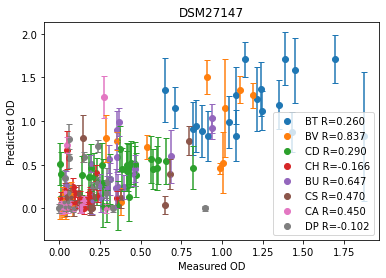

Total samples: 38, Updated regularization: 1.00e-05
Loss: 13.642, Residuals: -0.038
Loss: 8.023, Residuals: -0.015
Loss: 6.727, Residuals: -0.014
Loss: 5.914, Residuals: 0.021
Loss: 5.246, Residuals: -0.005
Loss: 4.741, Residuals: 0.002
Loss: 4.452, Residuals: -0.021
Loss: 4.420, Residuals: -0.030
Loss: 4.153, Residuals: -0.025
Loss: 4.088, Residuals: 0.042
Loss: 3.972, Residuals: 0.028
Loss: 3.781, Residuals: 0.004
Loss: 3.752, Residuals: 0.019
Loss: 3.706, Residuals: 0.003
Loss: 3.625, Residuals: -0.006
Loss: 3.620, Residuals: 0.004
Loss: 3.567, Residuals: -0.004
Loss: 3.477, Residuals: -0.014
Loss: 3.474, Residuals: -0.012
Loss: 3.451, Residuals: -0.020
Loss: 3.413, Residuals: -0.030
Loss: 3.412, Residuals: -0.025
Loss: 3.409, Residuals: -0.025
Loss: 3.383, Residuals: -0.033
Loss: 3.378, Residuals: -0.028
Loss: 3.370, Residuals: -0.030
Loss: 3.370, Residuals: -0.032
Loss: 3.359, Residuals: -0.035
Loss: 3.359, Residuals: -0.035
Loss: 3.345, Residuals: -0.040
Loss: 3.322, Residuals: -

Loss: 150.204, Residuals: 0.022
Loss: 150.186, Residuals: 0.023
Loss: 150.153, Residuals: 0.023
Loss: 150.106, Residuals: 0.023
Loss: 150.074, Residuals: 0.021
Loss: 150.056, Residuals: 0.021
Loss: 150.054, Residuals: 0.021
Loss: 150.052, Residuals: 0.021
Loss: 150.049, Residuals: 0.021
Loss: 150.045, Residuals: 0.021
Loss: 150.045, Residuals: 0.021
Evidence 454.923
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.43e+00
Loss: 150.555, Residuals: 0.023
Loss: 150.523, Residuals: 0.022
Loss: 150.503, Residuals: 0.022
Loss: 150.495, Residuals: 0.021
Loss: 150.495, Residuals: 0.021
Loss: 150.494, Residuals: 0.021
Loss: 150.493, Residuals: 0.021
Loss: 150.493, Residuals: 0.021
Loss: 150.493, Residuals: 0.021
Loss: 150.493, Residuals: 0.021
Loss: 150.493, Residuals: 0.021
Evidence 455.665
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.41e+00
Loss: 150.819, Residuals: 0.022
Loss: 150.810, Residuals: 0.021
Loss: 150.800, Residuals: 0.021
Loss

Loss: 149.109, Residuals: 0.012
Loss: 149.106, Residuals: 0.012
Loss: 149.103, Residuals: 0.012
Evidence 459.247
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.59e+00
Loss: 149.762, Residuals: 0.012
Loss: 149.745, Residuals: 0.012
Loss: 149.718, Residuals: 0.012
Loss: 149.684, Residuals: 0.012
Loss: 149.665, Residuals: 0.012
Loss: 149.663, Residuals: 0.011
Loss: 149.659, Residuals: 0.011
Loss: 149.653, Residuals: 0.011
Loss: 149.653, Residuals: 0.012
Loss: 149.652, Residuals: 0.012
Loss: 149.651, Residuals: 0.012
Loss: 149.651, Residuals: 0.012
Loss: 149.651, Residuals: 0.012
Loss: 149.651, Residuals: 0.011
Loss: 149.651, Residuals: 0.011
Loss: 149.650, Residuals: 0.011
Loss: 149.650, Residuals: 0.011
Evidence 460.709
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.54e+00
Loss: 150.135, Residuals: 0.011
Loss: 150.104, Residuals: 0.012
Loss: 150.090, Residuals: 0.011
Loss: 150.089, Residuals: 0.011
Loss: 150.087, Residuals: 0.011
Loss

Loss: 155.184, Residuals: 0.021
Loss: 155.183, Residuals: 0.021
Loss: 155.177, Residuals: 0.021
Loss: 155.175, Residuals: 0.021
Loss: 155.174, Residuals: 0.021
Loss: 155.173, Residuals: 0.021
Loss: 155.173, Residuals: 0.021
Loss: 155.172, Residuals: 0.021
Loss: 155.172, Residuals: 0.021
Loss: 155.171, Residuals: 0.021
Evidence 508.307
Updating hyper-parameters...
Total samples: 40, Updated regularization: 8.59e-01
Loss: 155.694, Residuals: 0.020
Loss: 155.683, Residuals: 0.021
Loss: 155.675, Residuals: 0.021
Loss: 155.675, Residuals: 0.020
Loss: 155.674, Residuals: 0.021
Loss: 155.672, Residuals: 0.021
Loss: 155.671, Residuals: 0.020
Loss: 155.671, Residuals: 0.020
Loss: 155.671, Residuals: 0.020
Loss: 155.671, Residuals: 0.020
Loss: 155.670, Residuals: 0.020
Loss: 155.670, Residuals: 0.020
Loss: 155.670, Residuals: 0.020
Evidence 508.973
Updating hyper-parameters...
Total samples: 40, Updated regularization: 8.43e-01
Loss: 156.006, Residuals: 0.020
Loss: 156.000, Residuals: 0.020
Loss

Loss: 155.996, Residuals: 0.032
Evidence 495.759
Updating hyper-parameters...
Total samples: 40, Updated regularization: 1.19e+00
Loss: 156.210, Residuals: 0.032
Loss: 156.200, Residuals: 0.032
Loss: 156.187, Residuals: 0.032
Loss: 156.181, Residuals: 0.031
Loss: 156.171, Residuals: 0.031
Loss: 156.170, Residuals: 0.031
Loss: 156.164, Residuals: 0.031
Loss: 156.164, Residuals: 0.031
Loss: 156.157, Residuals: 0.031
Loss: 156.157, Residuals: 0.031
Evidence 496.188
Pass count  1
Total samples: 40, Updated regularization: 1.00e-05
Loss: 13.714, Residuals: -0.066
Loss: 7.826, Residuals: -0.054
Loss: 5.687, Residuals: -0.050
Loss: 5.113, Residuals: -0.034
Loss: 4.519, Residuals: -0.040
Loss: 4.387, Residuals: -0.036
Loss: 4.177, Residuals: 0.000
Loss: 3.924, Residuals: -0.025
Loss: 3.913, Residuals: -0.031
Loss: 3.893, Residuals: -0.017
Loss: 3.734, Residuals: -0.026
Loss: 3.702, Residuals: 0.026
Loss: 3.643, Residuals: 0.018
Loss: 3.590, Residuals: -0.008
Loss: 3.501, Residuals: -0.011
Loss

Loss: 3.296, Residuals: -0.036
Loss: 3.267, Residuals: -0.042
Loss: 3.267, Residuals: -0.042
Loss: 3.266, Residuals: -0.042
Loss: 3.258, Residuals: -0.043
Loss: 3.258, Residuals: -0.044
Evidence -396.059
Updating hyper-parameters...
Total samples: 37, Updated regularization: 2.05e-02
Loss: 13.250, Residuals: -0.044
Loss: 13.033, Residuals: -0.039
Loss: 12.771, Residuals: -0.027
Loss: 12.749, Residuals: -0.019
Loss: 12.746, Residuals: -0.013
Loss: 12.741, Residuals: -0.013
Loss: 12.732, Residuals: -0.012
Loss: 12.665, Residuals: -0.003
Loss: 12.660, Residuals: -0.002
Loss: 12.651, Residuals: -0.000
Loss: 12.634, Residuals: 0.002
Loss: 12.605, Residuals: 0.005
Loss: 12.604, Residuals: 0.003
Loss: 12.602, Residuals: 0.004
Loss: 12.585, Residuals: 0.006
Loss: 12.585, Residuals: 0.006
Evidence 85.511
Updating hyper-parameters...
Total samples: 37, Updated regularization: 1.29e-01
Loss: 37.490, Residuals: 0.006
Loss: 37.435, Residuals: 0.006
Loss: 37.337, Residuals: 0.008
Loss: 37.192, Resid

Total samples: 40, Updated regularization: 1.70e-01
Loss: 44.768, Residuals: 0.003
Loss: 44.650, Residuals: 0.001
Loss: 44.429, Residuals: 0.003
Loss: 44.069, Residuals: 0.009
Loss: 44.068, Residuals: 0.009
Evidence 305.423
Updating hyper-parameters...
Total samples: 40, Updated regularization: 5.63e-01
Loss: 92.044, Residuals: 0.009
Loss: 91.772, Residuals: 0.009
Loss: 91.289, Residuals: 0.009
Loss: 90.587, Residuals: 0.007
Loss: 89.601, Residuals: 0.012
Loss: 89.550, Residuals: 0.013
Loss: 89.140, Residuals: 0.014
Loss: 89.092, Residuals: 0.010
Loss: 88.660, Residuals: 0.013
Loss: 88.400, Residuals: 0.023
Loss: 88.378, Residuals: 0.022
Loss: 88.343, Residuals: 0.022
Loss: 88.047, Residuals: 0.023
Loss: 88.040, Residuals: 0.024
Loss: 87.788, Residuals: 0.026
Loss: 87.779, Residuals: 0.026
Loss: 87.771, Residuals: 0.025
Loss: 87.697, Residuals: 0.025
Loss: 87.693, Residuals: 0.025
Loss: 87.538, Residuals: 0.027
Loss: 87.517, Residuals: 0.027
Loss: 87.505, Residuals: 0.026
Loss: 87.502,

Loss: 2.845, Residuals: -0.032
Loss: 2.828, Residuals: -0.037
Loss: 2.828, Residuals: -0.037
Loss: 2.827, Residuals: -0.037
Loss: 2.827, Residuals: -0.037
Loss: 2.826, Residuals: -0.037
Loss: 2.817, Residuals: -0.041
Loss: 2.817, Residuals: -0.041
Loss: 2.816, Residuals: -0.041
Loss: 2.808, Residuals: -0.046
Loss: 2.807, Residuals: -0.045
Loss: 2.807, Residuals: -0.044
Loss: 2.806, Residuals: -0.044
Loss: 2.805, Residuals: -0.044
Loss: 2.794, Residuals: -0.052
Loss: 2.793, Residuals: -0.052
Loss: 2.793, Residuals: -0.052
Evidence -416.096
Updating hyper-parameters...
Total samples: 38, Updated regularization: 2.87e-02
Loss: 13.434, Residuals: -0.052
Loss: 12.986, Residuals: -0.037
Loss: 12.722, Residuals: -0.002
Loss: 12.699, Residuals: 0.015
Loss: 12.659, Residuals: 0.012
Loss: 12.602, Residuals: 0.010
Loss: 12.508, Residuals: 0.015
Loss: 12.503, Residuals: 0.013
Loss: 12.451, Residuals: 0.018
Loss: 12.389, Residuals: 0.029
Loss: 12.387, Residuals: 0.027
Loss: 12.385, Residuals: 0.030

Loss: 149.128, Residuals: 0.032
Evidence 466.252
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.42e+00
Loss: 149.663, Residuals: 0.031
Loss: 149.623, Residuals: 0.032
Loss: 149.609, Residuals: 0.031
Loss: 149.606, Residuals: 0.031
Loss: 149.601, Residuals: 0.031
Loss: 149.601, Residuals: 0.031
Loss: 149.601, Residuals: 0.031
Loss: 149.601, Residuals: 0.031
Loss: 149.601, Residuals: 0.031
Evidence 466.932
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.42e+00
Loss: 149.585, Residuals: 0.031
Loss: 149.566, Residuals: 0.030
Loss: 149.559, Residuals: 0.030
Loss: 149.557, Residuals: 0.030
Loss: 149.557, Residuals: 0.031
Loss: 149.556, Residuals: 0.030
Loss: 149.556, Residuals: 0.030
Loss: 149.556, Residuals: 0.030
Evidence 467.482
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.43e+00
Loss: 149.744, Residuals: 0.031
Loss: 149.735, Residuals: 0.030
Loss: 149.731, Residuals: 0.030
Loss: 149.728, Residuals: 0.030
Lo

Loss: 142.895, Residuals: 0.021
Loss: 142.853, Residuals: 0.021
Loss: 142.781, Residuals: 0.021
Loss: 142.688, Residuals: 0.021
Loss: 142.637, Residuals: 0.020
Loss: 142.625, Residuals: 0.020
Loss: 142.604, Residuals: 0.019
Loss: 142.603, Residuals: 0.020
Loss: 142.586, Residuals: 0.020
Loss: 142.562, Residuals: 0.019
Loss: 142.562, Residuals: 0.019
Evidence 438.258
Updating hyper-parameters...
Total samples: 37, Updated regularization: 1.30e+00
Loss: 144.025, Residuals: 0.019
Loss: 143.963, Residuals: 0.019
Loss: 143.908, Residuals: 0.020
Loss: 143.886, Residuals: 0.018
Loss: 143.870, Residuals: 0.018
Loss: 143.870, Residuals: 0.018
Evidence 439.415
Updating hyper-parameters...
Total samples: 37, Updated regularization: 1.30e+00
Loss: 144.522, Residuals: 0.019
Loss: 144.508, Residuals: 0.018
Loss: 144.493, Residuals: 0.018
Loss: 144.484, Residuals: 0.018
Loss: 144.483, Residuals: 0.018
Loss: 144.475, Residuals: 0.018
Loss: 144.475, Residuals: 0.018
Loss: 144.472, Residuals: 0.018
Loss

Loss: 154.942, Residuals: 0.026
Loss: 154.942, Residuals: 0.026
Evidence 482.235
Updating hyper-parameters...
Total samples: 40, Updated regularization: 9.39e-01
Loss: 155.440, Residuals: 0.026
Loss: 155.421, Residuals: 0.025
Loss: 155.396, Residuals: 0.025
Loss: 155.394, Residuals: 0.025
Loss: 155.391, Residuals: 0.025
Loss: 155.385, Residuals: 0.025
Loss: 155.380, Residuals: 0.025
Loss: 155.380, Residuals: 0.025
Loss: 155.379, Residuals: 0.025
Loss: 155.379, Residuals: 0.025
Loss: 155.379, Residuals: 0.025
Loss: 155.379, Residuals: 0.025
Loss: 155.379, Residuals: 0.025
Loss: 155.379, Residuals: 0.025
Loss: 155.379, Residuals: 0.025
Loss: 155.379, Residuals: 0.025
Evidence 483.397
Updating hyper-parameters...
Total samples: 40, Updated regularization: 9.37e-01
Loss: 155.675, Residuals: 0.025
Loss: 155.661, Residuals: 0.025
Loss: 155.643, Residuals: 0.024
Loss: 155.641, Residuals: 0.024
Loss: 155.638, Residuals: 0.024
Loss: 155.633, Residuals: 0.024
Loss: 155.633, Residuals: 0.024
Loss

Loss: 38.774, Residuals: 0.034
Loss: 38.774, Residuals: 0.034
Loss: 38.772, Residuals: 0.034
Loss: 38.768, Residuals: 0.035
Loss: 38.768, Residuals: 0.035
Loss: 38.766, Residuals: 0.035
Loss: 38.763, Residuals: 0.035
Loss: 38.760, Residuals: 0.035
Loss: 38.760, Residuals: 0.035
Loss: 38.760, Residuals: 0.035
Loss: 38.758, Residuals: 0.035
Loss: 38.758, Residuals: 0.035
Loss: 38.757, Residuals: 0.034
Loss: 38.756, Residuals: 0.035
Loss: 38.756, Residuals: 0.035
Loss: 38.756, Residuals: 0.035
Loss: 38.755, Residuals: 0.035
Loss: 38.755, Residuals: 0.035
Loss: 38.755, Residuals: 0.035
Loss: 38.755, Residuals: 0.035
Loss: 38.754, Residuals: 0.035
Loss: 38.754, Residuals: 0.035
Loss: 38.754, Residuals: 0.035
Loss: 38.754, Residuals: 0.035
Loss: 38.754, Residuals: 0.035
Loss: 38.754, Residuals: 0.034
Loss: 38.754, Residuals: 0.034
Evidence 307.878
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.27e-01
Loss: 84.914, Residuals: 0.032
Loss: 84.758, Residuals: 0.031
Los

Loss: 2.828, Residuals: -0.005
Loss: 2.765, Residuals: -0.017
Loss: 2.756, Residuals: -0.029
Loss: 2.752, Residuals: -0.017
Loss: 2.722, Residuals: -0.026
Loss: 2.720, Residuals: -0.034
Loss: 2.700, Residuals: -0.040
Loss: 2.671, Residuals: -0.051
Loss: 2.671, Residuals: -0.051
Loss: 2.669, Residuals: -0.052
Loss: 2.667, Residuals: -0.052
Loss: 2.662, Residuals: -0.055
Loss: 2.658, Residuals: -0.057
Loss: 2.658, Residuals: -0.058
Loss: 2.640, Residuals: -0.064
Loss: 2.639, Residuals: -0.063
Loss: 2.639, Residuals: -0.065
Loss: 2.631, Residuals: -0.068
Loss: 2.631, Residuals: -0.068
Loss: 2.610, Residuals: -0.076
Loss: 2.605, Residuals: -0.075
Loss: 2.605, Residuals: -0.075
Loss: 2.603, Residuals: -0.076
Loss: 2.600, Residuals: -0.078
Loss: 2.580, Residuals: -0.083
Loss: 2.579, Residuals: -0.082
Loss: 2.577, Residuals: -0.082
Loss: 2.574, Residuals: -0.082
Loss: 2.571, Residuals: -0.084
Loss: 2.571, Residuals: -0.084
Loss: 2.535, Residuals: -0.088
Loss: 2.532, Residuals: -0.088
Loss: 2.

Evidence 500.542
Updating hyper-parameters...
Total samples: 40, Updated regularization: 1.57e+00
Loss: 155.573, Residuals: 0.005
Loss: 155.549, Residuals: 0.002
Loss: 155.524, Residuals: 0.002
Loss: 155.523, Residuals: 0.002
Loss: 155.523, Residuals: 0.002
Loss: 155.515, Residuals: 0.002
Loss: 155.506, Residuals: 0.002
Loss: 155.506, Residuals: 0.002
Evidence 501.430
Updating hyper-parameters...
Total samples: 40, Updated regularization: 1.52e+00
Loss: 155.826, Residuals: 0.003
Loss: 155.824, Residuals: 0.003
Loss: 155.806, Residuals: 0.002
Loss: 155.796, Residuals: 0.001
Loss: 155.796, Residuals: 0.001
Loss: 155.792, Residuals: 0.001
Loss: 155.788, Residuals: 0.001
Loss: 155.788, Residuals: 0.001
Loss: 155.787, Residuals: 0.001
Loss: 155.785, Residuals: 0.001
Loss: 155.785, Residuals: 0.001
Loss: 155.785, Residuals: 0.002
Loss: 155.785, Residuals: 0.002
Loss: 155.785, Residuals: 0.002
Evidence 502.049
Updating hyper-parameters...
Total samples: 40, Updated regularization: 1.47e+00
Lo

Loss: 149.854, Residuals: 0.018
Loss: 149.854, Residuals: 0.018
Loss: 149.854, Residuals: 0.018
Evidence 464.011
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.03e+00
Loss: 150.449, Residuals: 0.018
Loss: 150.432, Residuals: 0.019
Loss: 150.417, Residuals: 0.018
Loss: 150.413, Residuals: 0.018
Loss: 150.409, Residuals: 0.018
Loss: 150.405, Residuals: 0.018
Loss: 150.405, Residuals: 0.018
Loss: 150.404, Residuals: 0.018
Loss: 150.403, Residuals: 0.018
Loss: 150.402, Residuals: 0.018
Loss: 150.402, Residuals: 0.018
Loss: 150.402, Residuals: 0.018
Loss: 150.402, Residuals: 0.018
Loss: 150.402, Residuals: 0.018
Evidence 465.102
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.02e+00
Loss: 150.774, Residuals: 0.019
Loss: 150.761, Residuals: 0.018
Loss: 150.752, Residuals: 0.019
Loss: 150.750, Residuals: 0.018
Loss: 150.748, Residuals: 0.018
Loss: 150.747, Residuals: 0.018
Loss: 150.746, Residuals: 0.018
Loss: 150.745, Residuals: 0.018
Loss

Loss: 2.980, Residuals: -0.106
Loss: 2.977, Residuals: -0.106
Loss: 2.977, Residuals: -0.106
Loss: 2.977, Residuals: -0.106
Loss: 2.977, Residuals: -0.106
Loss: 2.974, Residuals: -0.106
Loss: 2.974, Residuals: -0.106
Loss: 2.974, Residuals: -0.106
Loss: 2.974, Residuals: -0.106
Loss: 2.974, Residuals: -0.106
Loss: 2.974, Residuals: -0.106
Loss: 2.973, Residuals: -0.106
Loss: 2.971, Residuals: -0.106
Loss: 2.971, Residuals: -0.106
Loss: 2.971, Residuals: -0.106
Loss: 2.971, Residuals: -0.106
Loss: 2.970, Residuals: -0.106
Loss: 2.970, Residuals: -0.106
Loss: 2.970, Residuals: -0.106
Loss: 2.970, Residuals: -0.106
Evidence -387.953
Updating hyper-parameters...
Total samples: 40, Updated regularization: 6.15e-04
Loss: 13.600, Residuals: -0.110
Loss: 13.415, Residuals: -0.097
Loss: 13.282, Residuals: -0.072
Loss: 13.267, Residuals: -0.064
Loss: 13.258, Residuals: -0.067
Loss: 13.243, Residuals: -0.071
Loss: 13.218, Residuals: -0.073
Loss: 13.213, Residuals: -0.070
Loss: 13.168, Residuals: 

Loss: 156.332, Residuals: -0.011
Loss: 156.327, Residuals: -0.011
Loss: 156.283, Residuals: -0.011
Loss: 156.215, Residuals: -0.010
Loss: 156.212, Residuals: -0.010
Loss: 156.211, Residuals: -0.010
Loss: 156.199, Residuals: -0.010
Loss: 156.181, Residuals: -0.009
Loss: 156.178, Residuals: -0.009
Loss: 156.178, Residuals: -0.009
Loss: 155.693, Residuals: -0.009
Loss: 155.622, Residuals: -0.008
Loss: 155.594, Residuals: -0.010
Loss: 155.546, Residuals: -0.010
Loss: 155.491, Residuals: -0.010
Loss: 155.481, Residuals: -0.010
Loss: 155.465, Residuals: -0.010
Loss: 155.443, Residuals: -0.010
Loss: 155.439, Residuals: -0.010
Loss: 154.845, Residuals: -0.010
Loss: 154.789, Residuals: -0.009
Loss: 154.695, Residuals: -0.010
Loss: 154.563, Residuals: -0.011
Loss: 154.463, Residuals: -0.009
Loss: 154.458, Residuals: -0.009
Loss: 154.415, Residuals: -0.009
Loss: 152.717, Residuals: -0.008
Loss: 152.627, Residuals: -0.005
Loss: 152.519, Residuals: -0.002
Loss: 152.421, Residuals: -0.006
Loss: 152.

Loss: 92.059, Residuals: 0.022
Loss: 91.616, Residuals: 0.020
Loss: 91.353, Residuals: 0.014
Loss: 90.994, Residuals: 0.019
Loss: 90.991, Residuals: 0.019
Loss: 90.960, Residuals: 0.019
Loss: 90.687, Residuals: 0.020
Loss: 90.672, Residuals: 0.020
Loss: 90.527, Residuals: 0.021
Loss: 90.526, Residuals: 0.022
Loss: 90.309, Residuals: 0.024
Loss: 90.303, Residuals: 0.023
Loss: 90.238, Residuals: 0.024
Loss: 90.229, Residuals: 0.024
Loss: 90.215, Residuals: 0.024
Loss: 90.214, Residuals: 0.024
Loss: 90.029, Residuals: 0.026
Loss: 90.010, Residuals: 0.026
Loss: 89.988, Residuals: 0.025
Loss: 89.984, Residuals: 0.025
Loss: 89.847, Residuals: 0.027
Loss: 89.838, Residuals: 0.027
Loss: 89.752, Residuals: 0.028
Loss: 89.618, Residuals: 0.029
Loss: 89.609, Residuals: 0.029
Loss: 89.600, Residuals: 0.029
Loss: 89.599, Residuals: 0.029
Loss: 89.585, Residuals: 0.029
Loss: 89.565, Residuals: 0.030
Loss: 89.565, Residuals: 0.030
Loss: 89.563, Residuals: 0.030
Loss: 89.561, Residuals: 0.030
Loss: 89

Loss: 40.027, Residuals: 0.016
Loss: 39.958, Residuals: 0.018
Loss: 39.958, Residuals: 0.018
Evidence 287.199
Updating hyper-parameters...
Total samples: 38, Updated regularization: 4.01e-01
Loss: 86.299, Residuals: 0.017
Loss: 86.079, Residuals: 0.018
Loss: 85.791, Residuals: 0.017
Loss: 85.393, Residuals: 0.015
Loss: 85.383, Residuals: 0.015
Loss: 85.367, Residuals: 0.015
Loss: 85.336, Residuals: 0.015
Loss: 85.064, Residuals: 0.017
Loss: 85.012, Residuals: 0.017
Loss: 84.913, Residuals: 0.018
Loss: 84.734, Residuals: 0.019
Loss: 84.454, Residuals: 0.020
Loss: 84.440, Residuals: 0.021
Loss: 84.428, Residuals: 0.020
Loss: 84.324, Residuals: 0.021
Loss: 84.321, Residuals: 0.021
Loss: 84.222, Residuals: 0.022
Loss: 84.214, Residuals: 0.021
Loss: 84.211, Residuals: 0.021
Loss: 84.089, Residuals: 0.023
Loss: 84.078, Residuals: 0.022
Loss: 84.076, Residuals: 0.023
Loss: 84.008, Residuals: 0.024
Loss: 83.999, Residuals: 0.023
Loss: 83.994, Residuals: 0.023
Loss: 83.951, Residuals: 0.024
Los

Loss: 3.213, Residuals: -0.053
Loss: 3.213, Residuals: -0.052
Loss: 3.209, Residuals: -0.053
Loss: 3.209, Residuals: -0.052
Loss: 3.172, Residuals: -0.063
Loss: 3.172, Residuals: -0.063
Evidence -413.238
Updating hyper-parameters...
Total samples: 40, Updated regularization: 2.20e-02
Loss: 14.315, Residuals: -0.060
Loss: 14.308, Residuals: -0.059
Loss: 14.294, Residuals: -0.057
Loss: 14.271, Residuals: -0.051
Loss: 14.074, Residuals: -0.043
Loss: 14.073, Residuals: -0.044
Loss: 13.944, Residuals: -0.036
Loss: 13.770, Residuals: -0.017
Loss: 13.765, Residuals: -0.018
Loss: 13.765, Residuals: -0.018
Evidence 113.513
Updating hyper-parameters...
Total samples: 40, Updated regularization: 1.35e-01
Loss: 43.922, Residuals: -0.018
Loss: 43.800, Residuals: -0.018
Loss: 42.806, Residuals: -0.009
Loss: 42.794, Residuals: -0.009
Loss: 42.778, Residuals: -0.010
Loss: 42.631, Residuals: -0.006
Loss: 42.394, Residuals: 0.001
Loss: 42.389, Residuals: 0.002
Loss: 42.214, Residuals: 0.005
Loss: 42.185

Loss: 13.745, Residuals: 0.005
Loss: 13.699, Residuals: 0.006
Loss: 13.634, Residuals: 0.012
Loss: 13.634, Residuals: 0.012
Loss: 13.619, Residuals: 0.013
Loss: 13.596, Residuals: 0.017
Loss: 13.590, Residuals: 0.018
Loss: 13.581, Residuals: 0.020
Loss: 13.580, Residuals: 0.020
Loss: 13.571, Residuals: 0.021
Loss: 13.558, Residuals: 0.022
Loss: 13.557, Residuals: 0.022
Loss: 13.551, Residuals: 0.022
Loss: 13.546, Residuals: 0.026
Loss: 13.545, Residuals: 0.025
Loss: 13.545, Residuals: 0.025
Evidence 115.753
Updating hyper-parameters...
Total samples: 40, Updated regularization: 2.61e-01
Loss: 43.403, Residuals: 0.025
Loss: 43.349, Residuals: 0.023
Loss: 43.256, Residuals: 0.023
Loss: 43.138, Residuals: 0.025
Loss: 43.131, Residuals: 0.024
Loss: 43.065, Residuals: 0.026
Loss: 42.952, Residuals: 0.029
Loss: 42.880, Residuals: 0.035
Loss: 42.879, Residuals: 0.034
Loss: 42.871, Residuals: 0.034
Loss: 42.856, Residuals: 0.035
Loss: 42.829, Residuals: 0.035
Loss: 42.826, Residuals: 0.035
Los

Loss: 157.834, Residuals: 0.006
Loss: 157.834, Residuals: 0.006
Loss: 157.833, Residuals: 0.006
Loss: 157.833, Residuals: 0.006
Evidence 496.673
Updating hyper-parameters...
Total samples: 40, Updated regularization: 1.43e+00
Loss: 158.007, Residuals: 0.007
Loss: 158.003, Residuals: 0.006
Loss: 158.000, Residuals: 0.006
Loss: 157.999, Residuals: 0.006
Loss: 157.999, Residuals: 0.006
Loss: 157.999, Residuals: 0.006
Loss: 157.999, Residuals: 0.006
Loss: 157.998, Residuals: 0.006
Loss: 157.998, Residuals: 0.006
Evidence 497.025
Pass count  1
Total samples: 39, Updated regularization: 1.00e-05
Loss: 13.522, Residuals: -0.042
Loss: 7.938, Residuals: -0.035
Loss: 6.607, Residuals: -0.030
Loss: 5.722, Residuals: -0.029
Loss: 5.223, Residuals: 0.029
Loss: 4.566, Residuals: -0.013
Loss: 4.472, Residuals: 0.042
Loss: 4.297, Residuals: 0.025
Loss: 4.019, Residuals: -0.005
Loss: 4.016, Residuals: -0.008
Loss: 3.988, Residuals: -0.004
Loss: 3.935, Residuals: -0.009
Loss: 3.851, Residuals: -0.016
Lo

Loss: 14.439, Residuals: 0.017
Loss: 14.439, Residuals: 0.016
Loss: 14.437, Residuals: 0.017
Loss: 14.433, Residuals: 0.017
Loss: 14.433, Residuals: 0.019
Loss: 14.431, Residuals: 0.019
Loss: 14.429, Residuals: 0.018
Loss: 14.428, Residuals: 0.019
Loss: 14.428, Residuals: 0.019
Loss: 14.428, Residuals: 0.019
Loss: 14.427, Residuals: 0.019
Loss: 14.427, Residuals: 0.019
Loss: 14.427, Residuals: 0.019
Loss: 14.427, Residuals: 0.019
Loss: 14.427, Residuals: 0.020
Loss: 14.426, Residuals: 0.019
Loss: 14.426, Residuals: 0.019
Loss: 14.426, Residuals: 0.019
Loss: 14.426, Residuals: 0.019
Loss: 14.426, Residuals: 0.019
Loss: 14.426, Residuals: 0.019
Loss: 14.426, Residuals: 0.019
Loss: 14.426, Residuals: 0.019
Loss: 14.426, Residuals: 0.019
Loss: 14.426, Residuals: 0.019
Loss: 14.426, Residuals: 0.019
Loss: 14.426, Residuals: 0.019
Loss: 14.426, Residuals: 0.019
Loss: 14.426, Residuals: 0.019
Loss: 14.426, Residuals: 0.019
Loss: 14.426, Residuals: 0.019
Loss: 14.426, Residuals: 0.019
Loss: 14

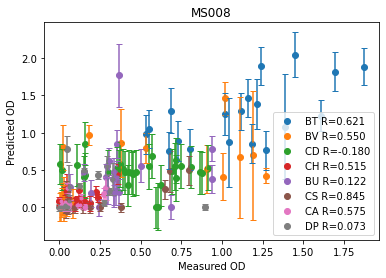

Total samples: 38, Updated regularization: 1.00e-05
Loss: 12.975, Residuals: -0.053
Loss: 7.490, Residuals: 0.011
Loss: 5.091, Residuals: -0.049
Loss: 4.306, Residuals: -0.040
Loss: 3.854, Residuals: -0.023
Loss: 3.791, Residuals: -0.010
Loss: 3.744, Residuals: -0.013
Loss: 3.654, Residuals: -0.017
Loss: 3.497, Residuals: -0.022
Loss: 3.263, Residuals: -0.033
Loss: 3.228, Residuals: -0.002
Loss: 3.171, Residuals: -0.012
Loss: 3.083, Residuals: -0.029
Loss: 3.076, Residuals: -0.021
Loss: 3.064, Residuals: -0.023
Loss: 3.041, Residuals: -0.028
Loss: 3.000, Residuals: -0.038
Loss: 2.980, Residuals: -0.036
Loss: 2.947, Residuals: -0.046
Loss: 2.944, Residuals: -0.042
Loss: 2.916, Residuals: -0.053
Loss: 2.912, Residuals: -0.051
Loss: 2.885, Residuals: -0.062
Loss: 2.884, Residuals: -0.058
Loss: 2.862, Residuals: -0.067
Loss: 2.861, Residuals: -0.064
Loss: 2.847, Residuals: -0.071
Loss: 2.846, Residuals: -0.071
Loss: 2.846, Residuals: -0.071
Loss: 2.840, Residuals: -0.073
Loss: 2.839, Resid

Loss: 150.963, Residuals: 0.016
Loss: 150.944, Residuals: 0.016
Loss: 150.942, Residuals: 0.015
Loss: 150.938, Residuals: 0.015
Loss: 150.936, Residuals: 0.015
Loss: 150.935, Residuals: 0.015
Loss: 150.935, Residuals: 0.015
Loss: 150.935, Residuals: 0.015
Loss: 150.935, Residuals: 0.015
Loss: 150.935, Residuals: 0.015
Evidence 462.462
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.75e+00
Loss: 151.158, Residuals: 0.016
Loss: 151.150, Residuals: 0.014
Loss: 151.144, Residuals: 0.015
Loss: 151.143, Residuals: 0.015
Loss: 151.141, Residuals: 0.015
Loss: 151.141, Residuals: 0.015
Loss: 151.141, Residuals: 0.015
Loss: 151.141, Residuals: 0.015
Loss: 151.141, Residuals: 0.015
Loss: 151.140, Residuals: 0.015
Evidence 462.895
Pass count  1
Total samples: 38, Updated regularization: 1.00e-05
Loss: 12.325, Residuals: -0.052
Loss: 6.924, Residuals: -0.034
Loss: 4.869, Residuals: -0.031
Loss: 4.166, Residuals: -0.024
Loss: 3.723, Residuals: -0.039
Loss: 3.550, Residuals:

Loss: 150.007, Residuals: 0.018
Loss: 150.006, Residuals: 0.018
Loss: 150.005, Residuals: 0.018
Loss: 150.005, Residuals: 0.018
Loss: 150.003, Residuals: 0.018
Evidence 463.760
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.77e+00
Loss: 150.668, Residuals: 0.017
Loss: 150.592, Residuals: 0.017
Loss: 150.537, Residuals: 0.018
Loss: 150.504, Residuals: 0.017
Loss: 150.495, Residuals: 0.017
Loss: 150.482, Residuals: 0.017
Loss: 150.473, Residuals: 0.017
Loss: 150.472, Residuals: 0.017
Loss: 150.472, Residuals: 0.017
Loss: 150.471, Residuals: 0.017
Loss: 150.470, Residuals: 0.017
Loss: 150.470, Residuals: 0.017
Loss: 150.470, Residuals: 0.017
Loss: 150.469, Residuals: 0.017
Loss: 150.469, Residuals: 0.017
Loss: 150.469, Residuals: 0.017
Loss: 150.469, Residuals: 0.017
Loss: 150.469, Residuals: 0.017
Loss: 150.469, Residuals: 0.017
Evidence 464.995
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.81e+00
Loss: 150.791, Residuals: 0.017
Loss

Loss: 90.327, Residuals: 0.016
Loss: 90.321, Residuals: 0.014
Loss: 90.309, Residuals: 0.015
Loss: 90.287, Residuals: 0.016
Loss: 90.248, Residuals: 0.017
Loss: 89.950, Residuals: 0.018
Loss: 89.929, Residuals: 0.017
Loss: 89.905, Residuals: 0.019
Loss: 89.903, Residuals: 0.020
Loss: 89.903, Residuals: 0.020
Loss: 89.902, Residuals: 0.020
Loss: 89.614, Residuals: 0.020
Loss: 89.595, Residuals: 0.022
Loss: 89.587, Residuals: 0.020
Loss: 89.586, Residuals: 0.020
Loss: 89.584, Residuals: 0.020
Loss: 89.372, Residuals: 0.020
Loss: 89.361, Residuals: 0.021
Loss: 89.340, Residuals: 0.021
Loss: 89.338, Residuals: 0.021
Loss: 89.338, Residuals: 0.021
Loss: 89.337, Residuals: 0.021
Loss: 89.251, Residuals: 0.021
Loss: 89.250, Residuals: 0.021
Loss: 89.250, Residuals: 0.021
Loss: 89.231, Residuals: 0.021
Loss: 89.196, Residuals: 0.021
Loss: 89.140, Residuals: 0.021
Loss: 89.137, Residuals: 0.021
Loss: 89.137, Residuals: 0.021
Loss: 89.137, Residuals: 0.022
Loss: 89.088, Residuals: 0.022
Loss: 89

Loss: 2.291, Residuals: -0.069
Loss: 2.271, Residuals: -0.075
Loss: 2.270, Residuals: -0.076
Loss: 2.269, Residuals: -0.075
Loss: 2.267, Residuals: -0.074
Loss: 2.262, Residuals: -0.073
Loss: 2.262, Residuals: -0.068
Loss: 2.229, Residuals: -0.077
Loss: 2.176, Residuals: -0.091
Loss: 2.172, Residuals: -0.076
Loss: 2.167, Residuals: -0.081
Loss: 2.128, Residuals: -0.093
Loss: 2.128, Residuals: -0.089
Loss: 2.127, Residuals: -0.089
Loss: 2.125, Residuals: -0.090
Loss: 2.124, Residuals: -0.091
Loss: 2.124, Residuals: -0.091
Loss: 2.107, Residuals: -0.098
Loss: 2.106, Residuals: -0.097
Loss: 2.106, Residuals: -0.098
Evidence -386.814
Updating hyper-parameters...
Total samples: 40, Updated regularization: 3.96e-03
Loss: 11.694, Residuals: -0.078
Loss: 11.685, Residuals: -0.081
Loss: 11.673, Residuals: -0.076
Loss: 11.651, Residuals: -0.074
Loss: 11.610, Residuals: -0.072
Loss: 11.540, Residuals: -0.068
Loss: 11.455, Residuals: -0.057
Loss: 11.454, Residuals: -0.058
Loss: 11.452, Residuals: 

Loss: 153.036, Residuals: 0.005
Loss: 152.985, Residuals: 0.006
Loss: 152.897, Residuals: 0.007
Loss: 152.787, Residuals: 0.008
Loss: 152.778, Residuals: 0.008
Loss: 152.767, Residuals: 0.009
Loss: 152.767, Residuals: 0.009
Loss: 152.751, Residuals: 0.009
Loss: 152.738, Residuals: 0.010
Loss: 152.736, Residuals: 0.010
Loss: 152.736, Residuals: 0.010
Loss: 152.734, Residuals: 0.010
Loss: 152.732, Residuals: 0.011
Loss: 152.732, Residuals: 0.011
Loss: 152.732, Residuals: 0.011
Loss: 152.732, Residuals: 0.011
Loss: 152.732, Residuals: 0.011
Loss: 152.732, Residuals: 0.011
Evidence 485.550
Updating hyper-parameters...
Total samples: 40, Updated regularization: 1.58e+00
Loss: 154.925, Residuals: 0.016
Loss: 154.787, Residuals: 0.017
Loss: 154.684, Residuals: 0.017
Loss: 154.656, Residuals: 0.016
Loss: 154.646, Residuals: 0.017
Loss: 154.630, Residuals: 0.018
Loss: 154.607, Residuals: 0.018
Loss: 154.605, Residuals: 0.019
Loss: 154.604, Residuals: 0.019
Loss: 154.600, Residuals: 0.019
Loss: 

Loss: 39.673, Residuals: -0.019
Loss: 39.506, Residuals: -0.019
Loss: 39.483, Residuals: -0.018
Loss: 39.441, Residuals: -0.017
Loss: 39.368, Residuals: -0.016
Loss: 39.241, Residuals: -0.014
Loss: 39.228, Residuals: -0.013
Loss: 39.115, Residuals: -0.011
Loss: 39.114, Residuals: -0.011
Loss: 38.945, Residuals: -0.007
Loss: 38.942, Residuals: -0.006
Loss: 38.937, Residuals: -0.006
Loss: 38.928, Residuals: -0.007
Loss: 38.928, Residuals: -0.007
Loss: 38.830, Residuals: -0.005
Loss: 38.830, Residuals: -0.005
Loss: 38.825, Residuals: -0.006
Loss: 38.825, Residuals: -0.006
Loss: 38.798, Residuals: -0.005
Loss: 38.798, Residuals: -0.005
Loss: 38.795, Residuals: -0.005
Loss: 38.718, Residuals: -0.002
Loss: 38.717, Residuals: -0.003
Loss: 38.715, Residuals: -0.003
Loss: 38.712, Residuals: -0.004
Loss: 38.710, Residuals: -0.004
Loss: 38.697, Residuals: -0.004
Loss: 38.696, Residuals: -0.004
Loss: 38.694, Residuals: -0.004
Loss: 38.675, Residuals: -0.003
Loss: 38.674, Residuals: -0.004
Loss: 38

Loss: 149.148, Residuals: -0.005
Loss: 149.147, Residuals: -0.005
Loss: 149.147, Residuals: -0.005
Loss: 149.147, Residuals: -0.005
Evidence 504.709
Updating hyper-parameters...
Total samples: 40, Updated regularization: 1.50e+00
Loss: 153.458, Residuals: -0.007
Loss: 153.335, Residuals: -0.006
Loss: 153.258, Residuals: -0.008
Loss: 153.251, Residuals: -0.009
Loss: 153.242, Residuals: -0.009
Loss: 153.232, Residuals: -0.009
Loss: 153.232, Residuals: -0.009
Loss: 153.231, Residuals: -0.009
Loss: 153.229, Residuals: -0.009
Loss: 153.228, Residuals: -0.009
Loss: 153.227, Residuals: -0.009
Loss: 153.226, Residuals: -0.009
Loss: 153.226, Residuals: -0.009
Loss: 153.226, Residuals: -0.009
Evidence 506.502
Updating hyper-parameters...
Total samples: 40, Updated regularization: 1.51e+00
Loss: 155.119, Residuals: -0.011
Loss: 155.078, Residuals: -0.009
Loss: 155.047, Residuals: -0.012
Loss: 155.031, Residuals: -0.011
Loss: 155.028, Residuals: -0.012
Loss: 155.027, Residuals: -0.012
Loss: 155.02

Loss: 145.604, Residuals: 0.004
Loss: 145.604, Residuals: 0.004
Loss: 145.603, Residuals: 0.004
Loss: 145.602, Residuals: 0.004
Loss: 145.602, Residuals: 0.004
Loss: 145.601, Residuals: 0.004
Loss: 145.601, Residuals: 0.004
Loss: 145.601, Residuals: 0.005
Loss: 145.601, Residuals: 0.005
Loss: 145.601, Residuals: 0.005
Loss: 145.601, Residuals: 0.005
Loss: 145.601, Residuals: 0.005
Loss: 145.601, Residuals: 0.005
Evidence 456.227
Pass count  1
Total samples: 40, Updated regularization: 1.00e-05
Loss: 13.249, Residuals: -0.076
Loss: 7.557, Residuals: -0.027
Loss: 5.312, Residuals: -0.041
Loss: 4.575, Residuals: -0.037
Loss: 4.061, Residuals: -0.067
Loss: 3.850, Residuals: -0.049
Loss: 3.801, Residuals: -0.007
Loss: 3.705, Residuals: -0.009
Loss: 3.534, Residuals: -0.019
Loss: 3.287, Residuals: -0.035
Loss: 3.257, Residuals: -0.008
Loss: 3.204, Residuals: -0.015
Loss: 3.128, Residuals: -0.024
Loss: 3.125, Residuals: -0.027
Loss: 3.119, Residuals: -0.026
Loss: 3.072, Residuals: -0.036
Loss

Loss: 151.720, Residuals: -0.004
Loss: 151.717, Residuals: -0.004
Loss: 151.059, Residuals: -0.003
Loss: 151.048, Residuals: -0.004
Loss: 151.034, Residuals: -0.002
Loss: 150.563, Residuals: -0.001
Loss: 150.539, Residuals: -0.002
Loss: 150.529, Residuals: -0.001
Loss: 150.438, Residuals: -0.001
Loss: 150.360, Residuals: -0.001
Loss: 150.320, Residuals: -0.001
Loss: 150.292, Residuals: 0.000
Loss: 150.271, Residuals: 0.000
Loss: 150.233, Residuals: 0.000
Loss: 150.221, Residuals: 0.000
Loss: 150.211, Residuals: 0.001
Loss: 150.136, Residuals: 0.001
Loss: 150.133, Residuals: 0.002
Loss: 150.127, Residuals: 0.002
Loss: 150.116, Residuals: 0.002
Loss: 150.104, Residuals: 0.002
Loss: 150.104, Residuals: 0.001
Loss: 150.095, Residuals: 0.001
Loss: 150.081, Residuals: 0.002
Loss: 150.081, Residuals: 0.002
Loss: 150.075, Residuals: 0.002
Loss: 150.069, Residuals: 0.002
Loss: 150.069, Residuals: 0.002
Loss: 150.059, Residuals: 0.002
Loss: 150.058, Residuals: 0.003
Loss: 150.056, Residuals: 0.0

Loss: 78.841, Residuals: 0.009
Loss: 78.840, Residuals: 0.009
Evidence 403.008
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.25e+00
Loss: 117.995, Residuals: 0.004
Loss: 117.223, Residuals: 0.004
Loss: 116.748, Residuals: 0.001
Loss: 116.705, Residuals: 0.005
Loss: 116.324, Residuals: 0.006
Loss: 116.320, Residuals: 0.006
Loss: 115.889, Residuals: 0.008
Loss: 115.880, Residuals: 0.009
Loss: 115.874, Residuals: 0.009
Loss: 115.663, Residuals: 0.010
Loss: 115.662, Residuals: 0.010
Loss: 115.609, Residuals: 0.010
Loss: 115.513, Residuals: 0.011
Loss: 115.380, Residuals: 0.013
Loss: 115.380, Residuals: 0.013
Evidence 447.695
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.82e+00
Loss: 136.902, Residuals: 0.009
Loss: 136.489, Residuals: 0.014
Loss: 136.236, Residuals: 0.009
Loss: 136.222, Residuals: 0.009
Loss: 136.087, Residuals: 0.010
Loss: 135.880, Residuals: 0.012
Loss: 135.860, Residuals: 0.013
Loss: 135.824, Residuals: 0.013
Loss: 

Loss: 1.848, Residuals: -0.082
Loss: 1.848, Residuals: -0.082
Loss: 1.848, Residuals: -0.082
Loss: 1.846, Residuals: -0.084
Loss: 1.846, Residuals: -0.084
Evidence -347.053
Updating hyper-parameters...
Total samples: 37, Updated regularization: 6.09e-04
Loss: 8.011, Residuals: -0.072
Loss: 8.009, Residuals: -0.071
Loss: 8.007, Residuals: -0.070
Loss: 8.003, Residuals: -0.067
Loss: 7.970, Residuals: -0.067
Loss: 7.921, Residuals: -0.066
Loss: 7.865, Residuals: -0.065
Loss: 7.861, Residuals: -0.068
Loss: 7.859, Residuals: -0.064
Loss: 7.856, Residuals: -0.063
Loss: 7.853, Residuals: -0.062
Loss: 7.847, Residuals: -0.062
Loss: 7.837, Residuals: -0.062
Loss: 7.836, Residuals: -0.062
Loss: 7.827, Residuals: -0.062
Loss: 7.811, Residuals: -0.060
Loss: 7.811, Residuals: -0.061
Loss: 7.811, Residuals: -0.061
Loss: 7.804, Residuals: -0.060
Loss: 7.802, Residuals: -0.061
Loss: 7.801, Residuals: -0.060
Loss: 7.800, Residuals: -0.060
Loss: 7.789, Residuals: -0.060
Loss: 7.789, Residuals: -0.060
Lo

Loss: 109.413, Residuals: 0.007
Loss: 109.408, Residuals: 0.007
Loss: 109.408, Residuals: 0.007
Loss: 109.405, Residuals: 0.007
Loss: 109.400, Residuals: 0.007
Loss: 109.400, Residuals: 0.007
Loss: 109.399, Residuals: 0.007
Loss: 109.397, Residuals: 0.007
Loss: 109.397, Residuals: 0.007
Loss: 109.397, Residuals: 0.007
Loss: 109.397, Residuals: 0.007
Loss: 109.396, Residuals: 0.007
Loss: 109.396, Residuals: 0.007
Loss: 109.396, Residuals: 0.007
Loss: 109.396, Residuals: 0.007
Loss: 109.395, Residuals: 0.007
Loss: 109.395, Residuals: 0.007
Loss: 109.394, Residuals: 0.007
Loss: 109.394, Residuals: 0.007
Loss: 109.394, Residuals: 0.007
Loss: 109.394, Residuals: 0.007
Loss: 109.394, Residuals: 0.007
Loss: 109.394, Residuals: 0.007
Loss: 109.393, Residuals: 0.007
Loss: 109.393, Residuals: 0.007
Evidence 419.628
Updating hyper-parameters...
Total samples: 37, Updated regularization: 3.21e-01
Loss: 132.521, Residuals: 0.012
Loss: 132.158, Residuals: 0.009
Loss: 131.611, Residuals: 0.009
Loss: 

Loss: 41.251, Residuals: 0.024
Loss: 41.250, Residuals: 0.023
Loss: 41.250, Residuals: 0.023
Loss: 41.250, Residuals: 0.023
Loss: 41.249, Residuals: 0.023
Loss: 41.249, Residuals: 0.023
Evidence 313.631
Updating hyper-parameters...
Total samples: 40, Updated regularization: 2.94e-01
Loss: 88.124, Residuals: 0.022
Loss: 87.686, Residuals: 0.019
Loss: 87.240, Residuals: 0.012
Loss: 86.959, Residuals: 0.016
Loss: 86.895, Residuals: 0.014
Loss: 86.860, Residuals: 0.015
Loss: 86.795, Residuals: 0.016
Loss: 86.694, Residuals: 0.017
Loss: 86.687, Residuals: 0.015
Loss: 86.628, Residuals: 0.016
Loss: 86.539, Residuals: 0.018
Loss: 86.536, Residuals: 0.017
Loss: 86.533, Residuals: 0.017
Loss: 86.527, Residuals: 0.017
Loss: 86.514, Residuals: 0.017
Loss: 86.493, Residuals: 0.017
Loss: 86.491, Residuals: 0.017
Loss: 86.473, Residuals: 0.017
Loss: 86.466, Residuals: 0.017
Loss: 86.465, Residuals: 0.017
Loss: 86.456, Residuals: 0.017
Loss: 86.447, Residuals: 0.018
Loss: 86.447, Residuals: 0.017
Los

Loss: 3.570, Residuals: -0.011
Loss: 3.297, Residuals: -0.020
Loss: 3.154, Residuals: 0.000
Loss: 3.137, Residuals: -0.008
Loss: 3.001, Residuals: -0.020
Loss: 2.991, Residuals: -0.003
Loss: 2.912, Residuals: -0.005
Loss: 2.787, Residuals: -0.018
Loss: 2.763, Residuals: 0.005
Loss: 2.746, Residuals: -0.005
Loss: 2.618, Residuals: -0.015
Loss: 2.612, Residuals: -0.007
Loss: 2.601, Residuals: -0.006
Loss: 2.509, Residuals: -0.021
Loss: 2.487, Residuals: -0.009
Loss: 2.446, Residuals: -0.018
Loss: 2.444, Residuals: -0.013
Loss: 2.430, Residuals: -0.013
Loss: 2.402, Residuals: -0.019
Loss: 2.399, Residuals: -0.013
Loss: 2.365, Residuals: -0.020
Loss: 2.365, Residuals: -0.017
Loss: 2.351, Residuals: -0.018
Loss: 2.350, Residuals: -0.018
Loss: 2.330, Residuals: -0.022
Loss: 2.325, Residuals: -0.017
Loss: 2.283, Residuals: -0.027
Loss: 2.282, Residuals: -0.026
Loss: 2.280, Residuals: -0.025
Loss: 2.269, Residuals: -0.028
Loss: 2.259, Residuals: -0.026
Loss: 2.259, Residuals: -0.026
Loss: 2.25

Loss: 80.115, Residuals: 0.017
Loss: 80.115, Residuals: 0.018
Loss: 80.111, Residuals: 0.017
Loss: 80.105, Residuals: 0.017
Loss: 80.104, Residuals: 0.017
Loss: 80.065, Residuals: 0.017
Loss: 80.065, Residuals: 0.017
Evidence 421.335
Updating hyper-parameters...
Total samples: 38, Updated regularization: 2.81e-02
Loss: 121.601, Residuals: 0.007
Loss: 121.473, Residuals: 0.015
Loss: 121.259, Residuals: 0.012
Loss: 121.053, Residuals: 0.011
Loss: 121.035, Residuals: 0.009
Loss: 120.889, Residuals: 0.010
Loss: 120.883, Residuals: 0.012
Loss: 120.823, Residuals: 0.011
Loss: 120.728, Residuals: 0.011
Loss: 120.725, Residuals: 0.012
Loss: 120.693, Residuals: 0.012
Loss: 120.639, Residuals: 0.012
Loss: 120.615, Residuals: 0.011
Loss: 120.606, Residuals: 0.012
Loss: 120.603, Residuals: 0.012
Loss: 120.602, Residuals: 0.012
Loss: 120.592, Residuals: 0.012
Loss: 120.578, Residuals: 0.012
Loss: 120.577, Residuals: 0.012
Loss: 120.577, Residuals: 0.012
Loss: 120.281, Residuals: 0.013
Loss: 120.251

Loss: 1.969, Residuals: -0.105
Loss: 1.969, Residuals: -0.105
Loss: 1.968, Residuals: -0.105
Loss: 1.967, Residuals: -0.107
Loss: 1.967, Residuals: -0.106
Loss: 1.967, Residuals: -0.107
Loss: 1.967, Residuals: -0.107
Loss: 1.965, Residuals: -0.108
Loss: 1.965, Residuals: -0.108
Evidence -373.014
Updating hyper-parameters...
Total samples: 40, Updated regularization: 8.39e-04
Loss: 10.600, Residuals: -0.095
Loss: 10.520, Residuals: -0.072
Loss: 10.420, Residuals: -0.066
Loss: 10.401, Residuals: -0.064
Loss: 10.388, Residuals: -0.063
Loss: 10.386, Residuals: -0.062
Loss: 10.314, Residuals: -0.060
Loss: 10.314, Residuals: -0.060
Loss: 10.266, Residuals: -0.057
Loss: 10.265, Residuals: -0.055
Loss: 10.258, Residuals: -0.055
Loss: 10.200, Residuals: -0.051
Loss: 10.199, Residuals: -0.053
Loss: 10.131, Residuals: -0.051
Loss: 10.130, Residuals: -0.050
Evidence 105.284
Updating hyper-parameters...
Total samples: 40, Updated regularization: 5.70e-03
Loss: 40.158, Residuals: -0.047
Loss: 40.131

Loss: 35.805, Residuals: 0.017
Loss: 35.805, Residuals: 0.017
Loss: 35.804, Residuals: 0.017
Loss: 35.800, Residuals: 0.017
Loss: 35.799, Residuals: 0.017
Loss: 35.794, Residuals: 0.017
Loss: 35.794, Residuals: 0.018
Loss: 35.793, Residuals: 0.018
Loss: 35.791, Residuals: 0.017
Loss: 35.791, Residuals: 0.018
Loss: 35.790, Residuals: 0.018
Loss: 35.790, Residuals: 0.018
Loss: 35.789, Residuals: 0.018
Loss: 35.788, Residuals: 0.017
Loss: 35.788, Residuals: 0.018
Loss: 35.787, Residuals: 0.018
Loss: 35.787, Residuals: 0.018
Loss: 35.787, Residuals: 0.018
Loss: 35.787, Residuals: 0.018
Loss: 35.787, Residuals: 0.018
Loss: 35.787, Residuals: 0.018
Loss: 35.787, Residuals: 0.018
Loss: 35.787, Residuals: 0.018
Loss: 35.787, Residuals: 0.017
Loss: 35.787, Residuals: 0.018
Loss: 35.786, Residuals: 0.018
Loss: 35.786, Residuals: 0.018
Loss: 35.786, Residuals: 0.018
Loss: 35.786, Residuals: 0.018
Loss: 35.786, Residuals: 0.018
Loss: 35.786, Residuals: 0.018
Loss: 35.786, Residuals: 0.018
Loss: 35

Loss: 2.654, Residuals: -0.098
Loss: 2.638, Residuals: -0.102
Loss: 2.638, Residuals: -0.099
Loss: 2.637, Residuals: -0.101
Loss: 2.631, Residuals: -0.102
Loss: 2.631, Residuals: -0.104
Loss: 2.630, Residuals: -0.105
Loss: 2.629, Residuals: -0.106
Loss: 2.629, Residuals: -0.104
Loss: 2.615, Residuals: -0.108
Loss: 2.615, Residuals: -0.106
Loss: 2.614, Residuals: -0.107
Loss: 2.604, Residuals: -0.108
Loss: 2.603, Residuals: -0.107
Loss: 2.603, Residuals: -0.107
Loss: 2.603, Residuals: -0.108
Loss: 2.603, Residuals: -0.107
Loss: 2.597, Residuals: -0.108
Loss: 2.597, Residuals: -0.108
Loss: 2.596, Residuals: -0.109
Loss: 2.596, Residuals: -0.109
Loss: 2.591, Residuals: -0.110
Loss: 2.590, Residuals: -0.109
Loss: 2.590, Residuals: -0.110
Loss: 2.589, Residuals: -0.109
Loss: 2.586, Residuals: -0.110
Loss: 2.586, Residuals: -0.110
Loss: 2.580, Residuals: -0.111
Loss: 2.580, Residuals: -0.111
Loss: 2.580, Residuals: -0.111
Loss: 2.576, Residuals: -0.112
Loss: 2.576, Residuals: -0.112
Loss: 2.

Loss: 2.676, Residuals: -0.089
Loss: 2.676, Residuals: -0.089
Loss: 2.676, Residuals: -0.088
Loss: 2.675, Residuals: -0.088
Loss: 2.675, Residuals: -0.088
Loss: 2.671, Residuals: -0.090
Loss: 2.671, Residuals: -0.090
Evidence -410.978
Updating hyper-parameters...
Total samples: 40, Updated regularization: 1.15e-02
Loss: 14.620, Residuals: -0.094
Loss: 14.615, Residuals: -0.094
Loss: 14.455, Residuals: -0.086
Loss: 14.217, Residuals: -0.069
Loss: 14.187, Residuals: -0.063
Loss: 14.179, Residuals: -0.059
Loss: 14.111, Residuals: -0.057
Loss: 14.109, Residuals: -0.055
Loss: 14.046, Residuals: -0.053
Loss: 13.946, Residuals: -0.048
Loss: 13.945, Residuals: -0.048
Loss: 13.945, Residuals: -0.048
Evidence 117.541
Updating hyper-parameters...
Total samples: 40, Updated regularization: 6.56e-02
Loss: 47.552, Residuals: -0.048
Loss: 47.546, Residuals: -0.048
Loss: 47.491, Residuals: -0.046
Loss: 47.397, Residuals: -0.045
Loss: 47.233, Residuals: -0.046
Loss: 47.219, Residuals: -0.045
Loss: 47.0

Loss: 158.261, Residuals: 0.016
Loss: 158.236, Residuals: 0.015
Loss: 158.213, Residuals: 0.016
Loss: 158.202, Residuals: 0.016
Loss: 158.200, Residuals: 0.016
Loss: 158.196, Residuals: 0.016
Loss: 158.193, Residuals: 0.016
Loss: 158.193, Residuals: 0.016
Loss: 158.193, Residuals: 0.016
Loss: 158.192, Residuals: 0.016
Loss: 158.192, Residuals: 0.016
Loss: 158.192, Residuals: 0.016
Loss: 158.192, Residuals: 0.016
Evidence 489.509
Updating hyper-parameters...
Total samples: 40, Updated regularization: 1.59e+00
Loss: 158.353, Residuals: 0.017
Loss: 158.341, Residuals: 0.016
Loss: 158.333, Residuals: 0.016
Loss: 158.328, Residuals: 0.016
Loss: 158.328, Residuals: 0.016
Loss: 158.327, Residuals: 0.016
Loss: 158.325, Residuals: 0.016
Loss: 158.325, Residuals: 0.016
Loss: 158.325, Residuals: 0.016
Loss: 158.325, Residuals: 0.016
Loss: 158.325, Residuals: 0.016
Loss: 158.325, Residuals: 0.016
Evidence 489.995
Pass count  1
Total samples: 38, Updated regularization: 1.00e-05
Loss: 13.144, Resid

Loss: 84.367, Residuals: 0.032
Loss: 84.289, Residuals: 0.030
Loss: 84.184, Residuals: 0.035
Loss: 84.032, Residuals: 0.035
Loss: 84.024, Residuals: 0.036
Loss: 83.966, Residuals: 0.036
Loss: 83.961, Residuals: 0.036
Loss: 83.950, Residuals: 0.036
Loss: 83.931, Residuals: 0.036
Loss: 83.903, Residuals: 0.036
Loss: 83.902, Residuals: 0.036
Loss: 83.900, Residuals: 0.036
Loss: 83.897, Residuals: 0.036
Loss: 83.892, Residuals: 0.036
Loss: 83.891, Residuals: 0.036
Loss: 83.889, Residuals: 0.036
Loss: 83.889, Residuals: 0.036
Loss: 83.889, Residuals: 0.036
Loss: 83.888, Residuals: 0.036
Loss: 83.888, Residuals: 0.036
Loss: 83.887, Residuals: 0.036
Loss: 83.887, Residuals: 0.036
Loss: 83.887, Residuals: 0.036
Loss: 83.887, Residuals: 0.036
Evidence 404.083
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.67e+00
Loss: 122.702, Residuals: 0.039
Loss: 122.384, Residuals: 0.030
Loss: 122.187, Residuals: 0.027
Loss: 122.144, Residuals: 0.029
Loss: 122.105, Residuals: 0.02

Loss: 152.407, Residuals: 0.009
Loss: 152.407, Residuals: 0.009
Evidence 466.274
Updating hyper-parameters...
Total samples: 38, Updated regularization: 1.93e+00
Loss: 152.520, Residuals: 0.010
Loss: 152.514, Residuals: 0.009
Loss: 152.505, Residuals: 0.008
Loss: 152.497, Residuals: 0.008
Loss: 152.497, Residuals: 0.009
Loss: 152.496, Residuals: 0.008
Loss: 152.496, Residuals: 0.008
Loss: 152.495, Residuals: 0.008
Evidence 466.634
Pass count  1
Total samples: 40, Updated regularization: 1.00e-05
Loss: 12.861, Residuals: -0.089
Loss: 7.210, Residuals: -0.011
Loss: 5.145, Residuals: -0.035
Loss: 4.250, Residuals: -0.021
Loss: 3.813, Residuals: -0.024
Loss: 3.770, Residuals: -0.029
Loss: 3.487, Residuals: -0.005
Loss: 3.426, Residuals: 0.026
Loss: 3.317, Residuals: 0.011
Loss: 3.145, Residuals: -0.002
Loss: 3.108, Residuals: -0.001
Loss: 3.041, Residuals: -0.011
Loss: 2.931, Residuals: -0.027
Loss: 2.914, Residuals: -0.005
Loss: 2.883, Residuals: -0.011
Loss: 2.827, Residuals: -0.024
Loss

Loss: 2.501, Residuals: -0.045
Loss: 2.480, Residuals: -0.052
Loss: 2.479, Residuals: -0.048
Loss: 2.469, Residuals: -0.052
Loss: 2.452, Residuals: -0.060
Loss: 2.450, Residuals: -0.061
Loss: 2.433, Residuals: -0.069
Loss: 2.432, Residuals: -0.069
Loss: 2.427, Residuals: -0.071
Loss: 2.419, Residuals: -0.076
Loss: 2.414, Residuals: -0.080
Loss: 2.414, Residuals: -0.080
Loss: 2.410, Residuals: -0.082
Loss: 2.409, Residuals: -0.080
Loss: 2.399, Residuals: -0.084
Loss: 2.397, Residuals: -0.084
Loss: 2.378, Residuals: -0.093
Loss: 2.370, Residuals: -0.095
Loss: 2.368, Residuals: -0.092
Loss: 2.365, Residuals: -0.092
Loss: 2.340, Residuals: -0.099
Loss: 2.334, Residuals: -0.095
Loss: 2.327, Residuals: -0.094
Loss: 2.327, Residuals: -0.094
Loss: 2.326, Residuals: -0.094
Loss: 2.326, Residuals: -0.093
Loss: 2.310, Residuals: -0.096
Loss: 2.310, Residuals: -0.095
Loss: 2.309, Residuals: -0.094
Loss: 2.307, Residuals: -0.094
Loss: 2.303, Residuals: -0.093
Loss: 2.303, Residuals: -0.094
Loss: 2.

Loss: 119.723, Residuals: 0.006
Loss: 119.722, Residuals: 0.006
Loss: 119.722, Residuals: 0.006
Loss: 119.722, Residuals: 0.006
Loss: 119.722, Residuals: 0.006
Loss: 119.722, Residuals: 0.006
Evidence 463.197
Updating hyper-parameters...
Total samples: 40, Updated regularization: 9.96e-01
Loss: 143.795, Residuals: 0.009
Loss: 143.557, Residuals: 0.007
Loss: 143.274, Residuals: 0.006
Loss: 142.864, Residuals: 0.007
Loss: 142.848, Residuals: 0.007
Loss: 142.704, Residuals: 0.007
Loss: 142.523, Residuals: 0.008
Loss: 142.522, Residuals: 0.007
Loss: 142.519, Residuals: 0.007
Loss: 142.514, Residuals: 0.007
Loss: 142.511, Residuals: 0.007
Loss: 142.509, Residuals: 0.007
Loss: 142.498, Residuals: 0.007
Loss: 142.496, Residuals: 0.007
Loss: 142.493, Residuals: 0.007
Loss: 142.493, Residuals: 0.007
Loss: 142.492, Residuals: 0.007
Loss: 142.491, Residuals: 0.007
Loss: 142.490, Residuals: 0.007
Evidence 487.627
Updating hyper-parameters...
Total samples: 40, Updated regularization: 1.20e+00
Loss

Loss: 124.738, Residuals: 0.000
Loss: 124.095, Residuals: -0.001
Loss: 123.590, Residuals: -0.006
Loss: 123.431, Residuals: 0.002
Loss: 123.397, Residuals: -0.001
Loss: 122.419, Residuals: -0.001
Loss: 122.221, Residuals: 0.001
Loss: 122.212, Residuals: 0.001
Loss: 122.197, Residuals: 0.001
Loss: 121.749, Residuals: 0.001
Loss: 121.671, Residuals: 0.002
Loss: 121.664, Residuals: 0.002
Loss: 121.656, Residuals: 0.002
Loss: 121.381, Residuals: 0.002
Loss: 121.370, Residuals: 0.003
Loss: 121.367, Residuals: 0.003
Loss: 121.350, Residuals: 0.003
Loss: 121.182, Residuals: 0.004
Loss: 120.918, Residuals: 0.008
Loss: 120.915, Residuals: 0.008
Loss: 120.911, Residuals: 0.008
Loss: 120.906, Residuals: 0.008
Loss: 120.896, Residuals: 0.008
Loss: 120.809, Residuals: 0.009
Loss: 120.807, Residuals: 0.009
Loss: 120.803, Residuals: 0.009
Loss: 120.629, Residuals: 0.018
Loss: 120.607, Residuals: 0.016
Loss: 120.592, Residuals: 0.018
Loss: 120.565, Residuals: 0.017
Loss: 120.523, Residuals: 0.016
Loss

Loss: 2.599, Residuals: -0.084
Loss: 2.598, Residuals: -0.083
Loss: 2.596, Residuals: -0.082
Loss: 2.593, Residuals: -0.081
Loss: 2.593, Residuals: -0.079
Loss: 2.588, Residuals: -0.081
Loss: 2.588, Residuals: -0.080
Loss: 2.573, Residuals: -0.088
Loss: 2.573, Residuals: -0.087
Loss: 2.572, Residuals: -0.087
Loss: 2.571, Residuals: -0.086
Loss: 2.570, Residuals: -0.087
Loss: 2.570, Residuals: -0.086
Loss: 2.552, Residuals: -0.095
Loss: 2.550, Residuals: -0.094
Loss: 2.549, Residuals: -0.092
Loss: 2.548, Residuals: -0.092
Loss: 2.546, Residuals: -0.092
Loss: 2.546, Residuals: -0.091
Loss: 2.530, Residuals: -0.096
Loss: 2.529, Residuals: -0.095
Loss: 2.528, Residuals: -0.094
Loss: 2.526, Residuals: -0.094
Loss: 2.526, Residuals: -0.095
Loss: 2.525, Residuals: -0.094
Loss: 2.525, Residuals: -0.094
Loss: 2.511, Residuals: -0.097
Loss: 2.510, Residuals: -0.097
Loss: 2.510, Residuals: -0.097
Loss: 2.506, Residuals: -0.097
Loss: 2.506, Residuals: -0.097
Loss: 2.506, Residuals: -0.096
Loss: 2.

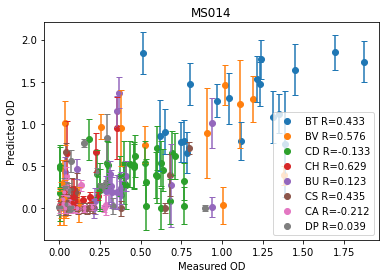

In [4]:
# run kfold for each file 
for file in files:
    
    # import data
    df = pd.read_csv(f"data/{file}")

    # determine species names 
    species = df.columns.values[2:]

    # separate mono culture data 
    # mono_df = pd.concat([df_i for name, df_i in df.groupby("Treatments") if "Mono" in name])
    dfs = [df_i for name, df_i in df.groupby("Treatments") if "Mono" not in name]

    # init kfold object
    kf = KFold(n_splits=20, shuffle=True, random_state=21)

    # keep track of all predictions
    all_pred_species = []
    all_true = []
    all_pred = []
    all_stdv = []

    # run Kfold 
    # train_index, test_index = next(iter(kf.split(dfs)))
    for train_index, test_index in kf.split(dfs):

        # get train df 
        train_df = pd.concat([dfs[i] for i in train_index])
        # train_df = pd.concat((mono_df, train_df))

        # get test df
        test_df = pd.concat([dfs[i] for i in test_index])

        # instantiate gLV fit 
        model = gLV(species, train_df)

        # fit to data 
        model.fit() 

        # plot fitness to data
        pred_species, true, pred, stdv = predict_df(model, test_df, species)

        # append predictions 
        all_pred_species = np.append(all_pred_species, pred_species)
        all_true = np.append(all_true, true)
        all_pred = np.append(all_pred, pred)
        all_stdv = np.append(all_stdv, stdv)

    # save prediction results to a .csv
    strain = file.split("_")[1]
    kfold_df = pd.DataFrame()
    kfold_df['species'] = all_pred_species
    kfold_df['true'] = all_true
    kfold_df['pred'] = all_pred
    kfold_df['stdv'] = all_stdv
    kfold_df.to_csv(f"kfold/{strain}_kfold.csv", index=False)
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain)
    plt.savefig(f"kfold/{strain}_kfold.pdf", dpi=300)
    plt.show()

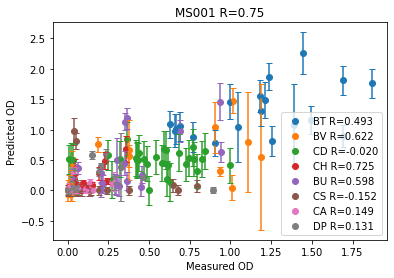

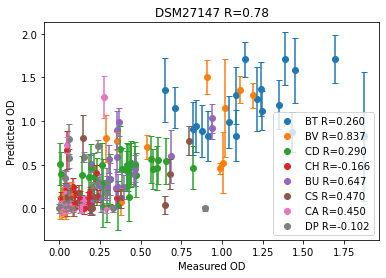

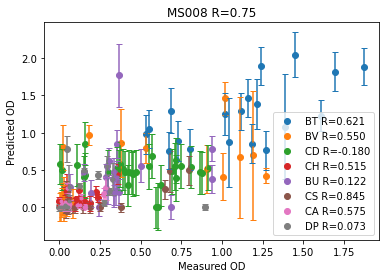

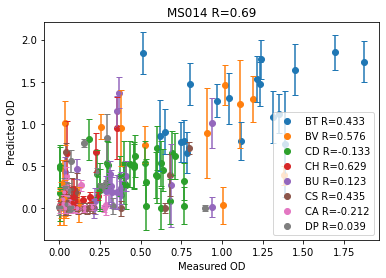

In [5]:
for file in files:
    strain = file.split("_")[1]
    kfold_df = pd.read_csv(f"kfold/{strain}_kfold.csv")
        
    all_pred_species = kfold_df['species'].values
    all_true = kfold_df['true'].values 
    all_pred = kfold_df['pred'].values
    all_stdv = kfold_df['stdv'].values
        
    R_overall = linregress(all_true, all_pred).rvalue
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain + " R={:.2f}".format(R_overall))
    plt.show()

# Show example fit

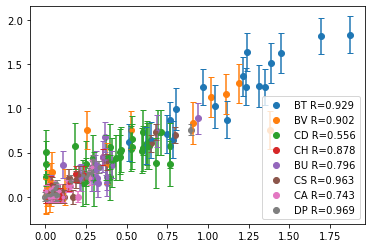

In [6]:
pred_species, true, pred, stdv = predict_df(model, train_df, species)

for sp in species:
    sp_inds = pred_species == sp
    if sum(true[sp_inds]) > 0:
        R = linregress(true[sp_inds], pred[sp_inds]).rvalue
        plt.scatter(true[sp_inds], pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(true[sp_inds], pred[sp_inds], yerr= stdv[sp_inds], 
                     fmt='.', capsize=3)
plt.legend()
plt.show()